# BIA 5302 –SPRING/SUMMER2023ASSIGNMENT #3

# Group Members

### Abdel Sini George (N01530574)

### Shilpa Annie John (N01531556)

### Wen Qin (N01533283)

### Goutham Prasad (N01531148)

# MILESTONE 1

## PROBLEM STATEMENT

a. While considering the real estate sector, it has been observed that the housing properties are either under priced or over priced i.e they are being bought and sold at prices well above or below the market standard prices which leads to unfair profit or loss among the concerned parties involved (buyers/sellers).</br>
b. The requirement of the project is to accuractely predict the housing price based on the historical housing sales data  which will help to clear the uncertainity related to the housing prices and help generate awareness among customers regarding the true market value of the housing.</br>
c. When the customers are well aware of the true market value, there is less chances of being exploited and it will also ensure that both the parties involved get the maximum benefit out of the deal.</br>
d. The analytic problem that needs to be solved is to predict the housing price based on certain set of predictor variable values with high level of accuracy.</br>
e. The success of the project would be a model which would predict the housing prices with 95% accuracy levels.

## CHOICE OF MODEL

a. Linear Regression model is used to accurately predict the outcome i.e the housing price based on the predictor variables like number of floors, living area etc.</br>

b. The data science pipeline of the solution will be as follows:</br>
        i. Extract and Load the data.</br>
        ii.Transform the data (i.e,Clean and enrich the data).</br>
        iii.Split the data into training and validation set.</br>
        iv. Build a linear regression model based on training set.</br>
        v. Evaluate the efficiency of the model on the validation set.</br>
        vi. Deploy the model to predict the housing prices based on real world data.

# DATA COLLECTION

a. Sberbank Russian Housing Market dataset is used for the regression analysis</br>
Link: https://www.kaggle.com/competitions/sberbank-russian-housing-market/data</br>
b. Each record in the Sberbank Russian Housing Market dataset corresponds to housing property transaction.</br>
c. The target variable is called price_doc.

# MILESTONE 2

## DATA PREPARATION & CLEANING

In [311]:
#Load necessary packages for the analysis 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import os
import statsmodels.api as sm

from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from mord import LogisticIT
from sklearn.linear_model import LinearRegression,LogisticRegression, LogisticRegressionCV
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from dmba import regressionSummary, exhaustive_search
from dmba import backward_elimination, forward_selection, stepwise_selection
from dmba import adjusted_r2_score, AIC_score, BIC_score
from dmba import classificationSummary, gainsChart, liftChart
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt
from sklearn.preprocessing import PolynomialFeatures

In [312]:
#Load data into the housing dataframe
housing_df=pd.read_csv('C:/Users/gouth/Desktop/Semester 3/Machine Learning/Assignment 3/Input/HousingData.csv')

In [313]:
#Preview records of the housing dataset 
housing_df.head()

,id,timestamp,full_sq,life_sq,floor,max_floor,material,build_year,num_room,kitch_sq,...,cafe_count_5000_price_2500,cafe_count_5000_price_4000,cafe_count_5000_price_high,big_church_count_5000,church_count_5000,mosque_count_5000,leisure_count_5000,sport_count_5000,market_count_5000,price_doc
0,1,2011-08-20,43,27.0,4.0,NaN,NaN,NaN,NaN,NaN,...,9,4,0,13,22,1,0,52,4,5850000
1,2,2011-08-23,34,19.0,3.0,NaN,NaN,NaN,NaN,NaN,...,15,3,0,15,29,1,10,66,14,6000000
2,3,2011-08-27,43,29.0,2.0,NaN,NaN,NaN,NaN,NaN,...,10,3,0,11,27,0,4,67,10,5700000
3,4,2011-09-01,89,50.0,9.0,NaN,NaN,NaN,NaN,NaN,...,11,2,1,4,4,0,0,26,3,13100000
4,5,2011-09-05,77,77.0,4.0,NaN,NaN,NaN,NaN,NaN,...,319,108,17,135,236,2,91,195,14,16331452


In [314]:
#Display all columns of the housing dataset
column_names = housing_df.columns
for i in range(0,len(column_names)):
    print(column_names[i])

id
timestamp
full_sq
life_sq
floor
max_floor
material
build_year
num_room
kitch_sq
state
product_type
sub_area
area_m
raion_popul
green_zone_part
indust_part
children_preschool
preschool_quota
preschool_education_centers_raion
children_school
school_quota
school_education_centers_raion
school_education_centers_top_20_raion
hospital_beds_raion
healthcare_centers_raion
university_top_20_raion
sport_objects_raion
additional_education_raion
culture_objects_top_25
culture_objects_top_25_raion
shopping_centers_raion
office_raion
thermal_power_plant_raion
incineration_raion
oil_chemistry_raion
radiation_raion
railroad_terminal_raion
big_market_raion
nuclear_reactor_raion
detention_facility_raion
full_all
male_f
female_f
young_all
young_male
young_female
work_all
work_male
work_female
ekder_all
ekder_male
ekder_female
0_6_all
0_6_male
0_6_female
7_14_all
7_14_male
7_14_female
0_17_all
0_17_male
0_17_female
16_29_all
16_29_male
16_29_female
0_13_all
0_13_male
0_13_female
raion_build_count_with_

In [315]:
#Create a subset of housing dataframe with most relevant variables for the ease of analysis
housing_variables = ['id','price_doc','full_sq','life_sq','floor','build_year','num_room','kitch_sq','product_type','sub_area','public_healthcare_km','university_km','workplaces_km','shopping_centers_km','preschool_km','church_count_3000','mosque_count_3000','leisure_count_3000','sport_count_3000','market_count_3000','oil_chemistry_km','nuclear_reactor_km','radiation_km','fitness_km','metro_min_walk','bus_terminal_avto_km']
housing_df_sub = housing_df[housing_variables]

In [316]:
#Preview records of the subset of housing dataframe 
housing_df_sub.head()

,id,price_doc,full_sq,life_sq,floor,build_year,num_room,kitch_sq,product_type,sub_area,...,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,oil_chemistry_km,nuclear_reactor_km,radiation_km,fitness_km,metro_min_walk,bus_terminal_avto_km
0,1,5850000,43,27.0,4.0,NaN,NaN,NaN,Investment,Bibirevo,...,0,0,21,1,18.152338,5.718519,1.210027,0.485841,13.575119,24.292406
1,2,6000000,34,19.0,3.0,NaN,NaN,NaN,Investment,Nagatinskij Zaton,...,0,6,19,1,9.034642,3.489954,2.724295,0.668364,7.620630,5.706113
2,3,5700000,43,29.0,2.0,NaN,NaN,NaN,Investment,Tekstil'shhiki,...,0,0,20,6,5.777394,7.506612,0.772216,0.733101,17.351515,6.710302
3,4,13100000,89,50.0,9.0,NaN,NaN,NaN,Investment,Mitino,...,0,0,18,3,27.667863,9.522538,6.348716,0.623484,11.565624,6.734618
4,5,16331452,77,77.0,4.0,NaN,NaN,NaN,Investment,Basmannoe,...,1,40,77,5,6.515857,8.671016,1.638318,0.220288,8.266305,1.423428


In [317]:
#Summary statistics of the dataset
housing_df_sub.describe()

,id,price_doc,full_sq,life_sq,floor,build_year,num_room,kitch_sq,public_healthcare_km,university_km,...,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,oil_chemistry_km,nuclear_reactor_km,radiation_km,fitness_km,metro_min_walk,bus_terminal_avto_km
count,30471.000000,3.047100e+04,30471.000000,24088.000000,30304.000000,1.686600e+04,20899.000000,20899.000000,30471.000000,30471.000000,...,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30471.000000,30446.000000,30471.000000
mean,15237.917397,7.123035e+06,54.214269,34.403271,7.670803,3.068057e+03,1.909804,6.399301,3.356771,6.855891,...,0.199075,3.876440,20.239310,2.319944,17.401611,10.945350,4.410781,1.154586,42.737601,9.992447
std,8796.501536,4.780111e+06,38.031487,52.285733,5.319989,1.543878e+05,0.851805,28.265979,4.341804,6.731484,...,0.447815,13.188748,18.843867,2.271539,10.399510,7.249756,5.595367,1.541425,69.303131,7.332000
min,1.000000,1.000000e+05,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000313,...,0.000000,0.000000,0.000000,0.000000,0.510710,0.309811,0.004663,0.000000,0.000000,0.062026
25%,7620.500000,4.740002e+06,38.000000,20.000000,3.000000,1.967000e+03,1.000000,1.000000,1.279126,2.201193,...,0.000000,0.000000,5.000000,0.000000,8.720666,5.237792,1.231846,0.361170,11.484150,5.213745
50%,15238.000000,6.274411e+06,49.000000,30.000000,6.500000,1.979000e+03,2.000000,6.000000,2.341579,4.337579,...,0.000000,0.000000,18.000000,2.000000,16.698447,8.965299,2.435160,0.656267,20.447209,7.454447
75%,22855.500000,8.300000e+06,63.000000,43.000000,11.000000,2.005000e+03,2.000000,9.000000,3.983903,9.380269,...,0.000000,2.000000,29.000000,4.000000,23.424518,16.372510,4.687054,1.333994,45.322032,13.283909
max,30473.000000,1.111111e+08,5326.000000,7478.000000,77.000000,2.005201e+07,19.000000,2014.000000,76.055135,84.862148,...,2.000000,85.000000,100.000000,10.000000,70.413434,64.256957,53.890157,26.652505,711.215806,74.796111


In [318]:
#Display the datatype of columns of housing_df_sub dataframe
housing_df_sub.dtypes

id                        int64
price_doc                 int64
full_sq                   int64
life_sq                 float64
floor                   float64
build_year              float64
num_room                float64
kitch_sq                float64
product_type             object
sub_area                 object
public_healthcare_km    float64
university_km           float64
workplaces_km           float64
shopping_centers_km     float64
preschool_km            float64
church_count_3000         int64
mosque_count_3000         int64
leisure_count_3000        int64
sport_count_3000          int64
market_count_3000         int64
oil_chemistry_km        float64
nuclear_reactor_km      float64
radiation_km            float64
fitness_km              float64
metro_min_walk          float64
bus_terminal_avto_km    float64
dtype: object

# MISSING VALUES

In [319]:
#Count the number of null values in different columns of DataFrame
null_count = housing_df_sub.isna().sum()
print(null_count)

id                          0
price_doc                   0
full_sq                     0
life_sq                  6383
floor                     167
build_year              13605
num_room                 9572
kitch_sq                 9572
product_type                0
sub_area                    0
public_healthcare_km        0
university_km               0
workplaces_km               0
shopping_centers_km         0
preschool_km                0
church_count_3000           0
mosque_count_3000           0
leisure_count_3000          0
sport_count_3000            0
market_count_3000           0
oil_chemistry_km            0
nuclear_reactor_km          0
radiation_km                0
fitness_km                  0
metro_min_walk             25
bus_terminal_avto_km        0
dtype: int64


It has been observed that there are 13,605 null values present in column named build_year. However it is not appropriate to impute median or mode value for the missing values of build_year variable hence we have decided to remove all records for which there is a missing value for build_year attribute.

In [320]:
#Remove records based on missing values of build_year attribute
housing_df_sub.dropna(subset = ['build_year'], inplace=True)

C:\Users\gouth\AppData\Local\Temp\ipykernel_38380\3927770037.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_sub.dropna(subset = ['build_year'], inplace=True)


In [321]:
#Count null values in different columns of dataFrame
null_count_2 = housing_df_sub.isna().sum()
print(null_count_2)

id                        0
price_doc                 0
full_sq                   0
life_sq                 778
floor                     0
build_year                0
num_room                  0
kitch_sq                  0
product_type              0
sub_area                  0
public_healthcare_km      0
university_km             0
workplaces_km             0
shopping_centers_km       0
preschool_km              0
church_count_3000         0
mosque_count_3000         0
leisure_count_3000        0
sport_count_3000          0
market_count_3000         0
oil_chemistry_km          0
nuclear_reactor_km        0
radiation_km              0
fitness_km                0
metro_min_walk           21
bus_terminal_avto_km      0
dtype: int64


## IMPUTATION 
a. Impute median of column values for missing values when the distribution is skewed as median is less sensitive to outliers as compared to mean.</br> b. Impute mean of column values for missing values when the distribution is approximately normal.


In [322]:
# Impute median/mode value of column variables based on the type distribution of column values 
for i in housing_df_sub.columns:
    if housing_df_sub[i].isnull().sum()>0:
        #Determine the skewness of column values distribution  
        skew_val = housing_df_sub[i].skew(skipna = True)
        #Impute median for distribution that has significant level of skewness
        if (np.abs(skew_val))>1:
            housing_df_sub[i].fillna(housing_df_sub[i].median(),inplace=True)
        #Impute median for distribution that has negligible level of skewness
        else:
            housing_df_sub[i].fillna(housing_df_sub[i].mean(),inplace=True)


C:\Users\gouth\AppData\Local\Temp\ipykernel_38380\1111281294.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_sub[i].fillna(housing_df_sub[i].median(),inplace=True)


In [323]:
#Count null values in different columns of dataframe after imputation 
null_count_3 = housing_df_sub.isna().sum()
print(null_count_3)

id                      0
price_doc               0
full_sq                 0
life_sq                 0
floor                   0
build_year              0
num_room                0
kitch_sq                0
product_type            0
sub_area                0
public_healthcare_km    0
university_km           0
workplaces_km           0
shopping_centers_km     0
preschool_km            0
church_count_3000       0
mosque_count_3000       0
leisure_count_3000      0
sport_count_3000        0
market_count_3000       0
oil_chemistry_km        0
nuclear_reactor_km      0
radiation_km            0
fitness_km              0
metro_min_walk          0
bus_terminal_avto_km    0
dtype: int64


# DUPLICATE VALUES

In [324]:
#Select and display the duplicate rows of the dataframe
duplicate_df = housing_df_sub[housing_df_sub.duplicated(keep=False)]
print(duplicate_df)

Empty DataFrame
Columns: [id, price_doc, full_sq, life_sq, floor, build_year, num_room, kitch_sq, product_type, sub_area, public_healthcare_km, university_km, workplaces_km, shopping_centers_km, preschool_km, church_count_3000, mosque_count_3000, leisure_count_3000, sport_count_3000, market_count_3000, oil_chemistry_km, nuclear_reactor_km, radiation_km, fitness_km, metro_min_walk, bus_terminal_avto_km]
Index: []

[0 rows x 26 columns]


It can be observed that there are no duplicate values present in the subset of housing dataset hence no action is required.

# LOW VARIATION DATA

In [325]:
for s in housing_df_sub.columns:
    # Filter the categorical attributes and find out unique values of categorical attributes 
    if housing_df_sub[s].dtype== object:
        print("Categorical variable:",s)
        print("Distinct values of the categorical value:",housing_df_sub[s].unique())
        print("\n")

Categorical variable: product_type
Distinct values of the categorical value: ['Investment' 'OwnerOccupier']


Categorical variable: sub_area
Distinct values of the categorical value: ['Hamovniki' 'Lianozovo' 'Poselenie Voskresenskoe' 'Severnoe Butovo'
 'Filevskij Park' 'Nekrasovka' 'Juzhnoe Medvedkovo'
 'Poselenie Pervomajskoe' 'Solncevo' 'Ajeroport'
 'Orehovo-Borisovo Juzhnoe' 'Nagornoe' "Mar'ino" 'Strogino'
 'Chertanovo Severnoe' 'Shhukino' 'Horoshevo-Mnevniki' 'Ramenki'
 'Preobrazhenskoe' 'Dmitrovskoe' 'Mitino' "Kon'kovo"
 'Poselenie Moskovskij' 'Sokol' 'Ostankinskoe' 'Juzhnoe Tushino'
 'Vostochnoe Degunino' 'Bibirevo' 'Rostokino' 'Juzhnoe Butovo'
 'Horoshevskoe' 'Meshhanskoe' 'Otradnoe' 'Krylatskoe' 'Golovinskoe'
 'Brateevo' 'Marfino' 'Ivanovskoe' "Mar'ina Roshha" "Altuf'evskoe"
 'Sviblovo' 'Mozhajskoe' 'Caricyno' 'Basmannoe' 'Koptevo'
 'Pokrovskoe Streshnevo' "Gol'janovo" 'Rjazanskij' 'Fili Davydkovo'
 'Zapadnoe Degunino' "Tekstil'shhiki" 'Juzhnoportovoe' 'Donskoe'
 'Chertanovo Ju

Since there are no categorical variables with only one unique value, it can be concluded that there is no low variation data in the dataset

# IRRELEVANT DATA

In [326]:
#Determine the distinct values of categorical variable which has lower number of occurances
print("Distinct values of the sub_area attribute:",housing_df_sub['sub_area'].nunique())

list1 = []
list2 = []
j=0

words = housing_df_sub['sub_area'].tolist()
values, counts = np.unique(words, return_counts=True)
for i in range(0,(len(values))):
    if counts[i]<=50:
        list1.append(values[i])
        list2.append(counts[i])
        print(list1[j],": ",list2[j])
        j=j+1
        

Distinct values of the sub_area attribute: 146
Altuf'evskoe :  45
Arbat :  8
Begovoe :  39
Dorogomilovo :  38
Kapotnja :  26
Krasnosel'skoe :  20
Kurkino :  34
Metrogorodok :  48
Molzhaninovskoe :  3
Nizhegorodskoe :  48
Poselenie Kievskij :  2
Poselenie Klenovskoe :  1
Poselenie Kokoshkino :  9
Poselenie Krasnopahorskoe :  16
Poselenie Marushkinskoe :  5
Poselenie Mihajlovo-Jarcevskoe :  1
Poselenie Mosrentgen :  13
Poselenie Rjazanovskoe :  23
Poselenie Rogovskoe :  11
Poselenie Shhapovskoe :  1
Poselenie Voronovskoe :  5
Rostokino :  45
Severnoe :  21
Sokol'niki :  43
Vnukovo :  29
Vostochnoe :  5
Zamoskvorech'e :  35


### INFERENCE 
a.It has been observed that there are some distinct values of sub_area attribute that repeats only very few times.</br>
b.If such records with very few occurances are used for building the model there is a high chance of bias in results. Hence they are irrelevant and should be removed</br>
c. Hence we only include records where the number of occurance of sub_area attribute is atleast 50 in order to eliminate bias.

In [327]:
#Remove records based on the number of occurances of distinct values of categorical variable sub_area(occurance<50)
for k in range(0,(len(list1))):
    housing_df_sub.drop(housing_df_sub[(housing_df_sub['sub_area'] == list1[k])].index, inplace=True)


C:\Users\gouth\AppData\Local\Temp\ipykernel_38380\2013907439.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_sub.drop(housing_df_sub[(housing_df_sub['sub_area'] == list1[k])].index, inplace=True)


# INCORRECT DATA

In [328]:
#Summary Statistics of the subset of housing dataset
housing_df_sub.describe()

,id,price_doc,full_sq,life_sq,floor,build_year,num_room,kitch_sq,public_healthcare_km,university_km,...,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,oil_chemistry_km,nuclear_reactor_km,radiation_km,fitness_km,metro_min_walk,bus_terminal_avto_km
count,16292.000000,1.629200e+04,16292.000000,16292.000000,16292.000000,1.629200e+04,16292.00000,16292.000000,16292.000000,16292.000000,...,16292.000000,16292.000000,16292.000000,16292.000000,16292.000000,16292.000000,16292.000000,16292.000000,16292.000000,16292.000000
mean,19963.803585,7.666563e+06,53.326848,33.980481,7.213970,3.107754e+03,1.93463,7.386631,2.777857,5.724972,...,0.197643,3.654370,22.462804,2.662718,16.205150,9.815412,3.806228,0.914332,37.887308,9.454667
std,6032.836082,4.931769e+06,21.185421,61.406425,5.123124,1.570840e+05,0.86642,27.874295,3.337693,5.727516,...,0.436755,11.818676,17.239303,2.254476,10.081569,6.823413,5.234397,1.131389,65.348919,7.018115
min,8059.000000,1.000000e+05,0.000000,0.000000,0.000000,0.000000e+00,0.00000,0.000000,0.002657,0.000313,...,0.000000,0.000000,0.000000,0.000000,0.510710,0.309811,0.004663,0.000000,0.000000,0.062026
25%,14774.750000,5.250000e+06,38.000000,20.000000,3.000000,1.967000e+03,1.00000,5.000000,1.123353,2.051800,...,0.000000,0.000000,10.000000,1.000000,8.263543,4.719527,1.126077,0.337546,10.569164,4.834358
50%,19917.500000,6.800000e+06,48.000000,30.000000,6.000000,1.979000e+03,2.00000,7.000000,1.931423,3.456094,...,0.000000,1.000000,21.000000,2.000000,15.037220,7.696685,1.980027,0.564624,17.685377,7.253743
75%,25206.750000,9.000000e+06,63.000000,42.000000,10.000000,2.005000e+03,3.00000,9.000000,3.086760,8.173449,...,0.000000,3.000000,30.000000,4.000000,21.868671,14.729082,3.786971,0.961923,29.715430,12.406193
max,30473.000000,9.512250e+07,637.000000,7478.000000,77.000000,2.005201e+07,19.00000,2014.000000,29.990624,41.971774,...,2.000000,85.000000,100.000000,10.000000,58.054370,46.911720,38.114286,8.826864,534.645955,46.444751


## INFERENCE
a. It can be observed from the minimum values of summary statistics, there are some incorrect data present in numerical attributes of the dataset .</br>
b. Certain variables are having non permissible values (like 0 for variables like build_year,floor etc.)</br>
c. Build_year variable maximum value is not a valid year.

In [329]:
#Summary Statistics of the subset of housing dataset
housing_df_sub['build_year'].describe()

count    1.629200e+04
mean     3.107754e+03
std      1.570840e+05
min      0.000000e+00
25%      1.967000e+03
50%      1.979000e+03
75%      2.005000e+03
max      2.005201e+07
Name: build_year, dtype: float64

In [330]:
#Remove records with invalid values of buid_year based on min value of summary statistics
housing_df_sub.drop(housing_df_sub[(housing_df_sub['build_year'] < 1500)].index, inplace=True)
#Remove records with invalid values of buid_year based on max value of summary statistics
housing_df_sub.drop(housing_df_sub[(housing_df_sub['build_year'] > 2023)].index, inplace=True)

C:\Users\gouth\AppData\Local\Temp\ipykernel_38380\316677919.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_sub.drop(housing_df_sub[(housing_df_sub['build_year'] < 1500)].index, inplace=True)
C:\Users\gouth\AppData\Local\Temp\ipykernel_38380\316677919.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_sub.drop(housing_df_sub[(housing_df_sub['build_year'] > 2023)].index, inplace=True)


In [331]:
#Summary Statistics of the subset of housing dataset
housing_df_sub['build_year'].describe()

count    15397.000000
mean      1985.703579
std         20.812561
min       1691.000000
25%       1969.000000
50%       1982.000000
75%       2006.000000
max       2018.000000
Name: build_year, dtype: float64

In [332]:
non_zero_variables = ['price_doc','full_sq','life_sq','floor','num_room','kitch_sq']

#Remove records with invalid values (value equal to zero)
for k in range(0,(len(non_zero_variables))):
    housing_df_sub.drop(housing_df_sub[(housing_df_sub[non_zero_variables[k]] == 0)].index, inplace=True)


C:\Users\gouth\AppData\Local\Temp\ipykernel_38380\3737630480.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_sub.drop(housing_df_sub[(housing_df_sub[non_zero_variables[k]] == 0)].index, inplace=True)


In [333]:
#Summary Statistics of the subset of housing dataset
housing_df_sub.describe()

,id,price_doc,full_sq,life_sq,floor,build_year,num_room,kitch_sq,public_healthcare_km,university_km,...,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,oil_chemistry_km,nuclear_reactor_km,radiation_km,fitness_km,metro_min_walk,bus_terminal_avto_km
count,15199.000000,1.519900e+04,15199.000000,15199.000000,15199.000000,15199.000000,15199.000000,15199.000000,15199.000000,15199.000000,...,15199.000000,15199.000000,15199.000000,15199.000000,15199.000000,15199.000000,15199.000000,15199.000000,15199.000000,15199.000000
mean,19866.824594,7.748960e+06,53.006579,33.410224,7.155273,1985.395618,1.944865,7.815119,2.591782,5.332704,...,0.200868,3.583723,23.246398,2.767682,15.525964,9.373934,3.474212,0.839988,35.176493,9.091821
std,6025.524576,5.022713e+06,21.047836,63.133998,5.055525,20.704604,0.868427,28.799325,3.006218,5.297490,...,0.433629,11.215141,16.764299,2.240634,9.660359,6.481592,4.857907,1.026626,60.525494,6.725625
min,8059.000000,1.000000e+05,1.000000,1.000000,1.000000,1691.000000,1.000000,1.000000,0.002657,0.000313,...,0.000000,0.000000,0.000000,0.000000,0.510710,0.309811,0.004663,0.000000,0.000000,0.062026
25%,14668.500000,5.300000e+06,38.000000,20.000000,3.000000,1968.000000,1.000000,5.000000,1.069372,1.969206,...,0.000000,0.000000,12.000000,1.000000,8.057276,4.580089,1.098449,0.330744,10.204733,4.679864
50%,19776.000000,6.866860e+06,47.000000,30.000000,6.000000,1981.000000,2.000000,8.000000,1.835805,3.297902,...,0.000000,1.000000,22.000000,2.000000,14.418417,7.313781,1.919277,0.547119,17.003979,7.157971
75%,25094.000000,9.129228e+06,62.000000,41.000000,10.000000,2006.000000,3.000000,9.000000,2.952334,7.470701,...,0.000000,3.000000,31.000000,4.000000,20.800516,13.834682,3.397437,0.877002,28.298723,11.687548
max,30473.000000,9.512250e+07,637.000000,7478.000000,77.000000,2018.000000,19.000000,2014.000000,29.990624,41.971774,...,2.000000,85.000000,100.000000,10.000000,58.054370,46.911720,38.114286,8.826864,534.645955,46.444751


# CATEGORICAL DATA

In [334]:
#Encoding the categorical attribute product_type
housing_df_sub['product_type'] = housing_df_sub['product_type'].replace({'Investment': 1, 'OwnerOccupier': 2})

C:\Users\gouth\AppData\Local\Temp\ipykernel_38380\2839329261.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_sub['product_type'] = housing_df_sub['product_type'].replace({'Investment': 1, 'OwnerOccupier': 2})


In [335]:
#Preview thw subset of housing dataset after encoding
dist_val = housing_df_sub['sub_area'].unique()
dist_val.sort()
print("Encoding of sub_area categorical variables is as follows: \n")
for i in range(0,len(dist_val)):
    housing_df_sub['sub_area'] = housing_df_sub['sub_area'].replace({dist_val[i]:(i+1)})
    print(dist_val[i],":", i+1)

Encoding of sub_area categorical variables is as follows: 

Ajeroport : 1
Akademicheskoe : 2
Alekseevskoe : 3
Babushkinskoe : 4
Basmannoe : 5
Beskudnikovskoe : 6
Bibirevo : 7
Birjulevo Vostochnoe : 8
Birjulevo Zapadnoe : 9
Bogorodskoe : 10
Brateevo : 11
Butyrskoe : 12
Caricyno : 13
Cheremushki : 14
Chertanovo Central'noe : 15
Chertanovo Juzhnoe : 16
Chertanovo Severnoe : 17
Danilovskoe : 18
Dmitrovskoe : 19
Donskoe : 20
Filevskij Park : 21
Fili Davydkovo : 22
Gagarinskoe : 23
Gol'janovo : 24
Golovinskoe : 25
Hamovniki : 26
Horoshevo-Mnevniki : 27
Horoshevskoe : 28
Hovrino : 29
Ivanovskoe : 30
Izmajlovo : 31
Jakimanka : 32
Jaroslavskoe : 33
Jasenevo : 34
Juzhnoe Butovo : 35
Juzhnoe Medvedkovo : 36
Juzhnoe Tushino : 37
Juzhnoportovoe : 38
Kon'kovo : 39
Koptevo : 40
Kosino-Uhtomskoe : 41
Kotlovka : 42
Krjukovo : 43
Krylatskoe : 44
Kuncevo : 45
Kuz'minki : 46
Lefortovo : 47
Levoberezhnoe : 48
Lianozovo : 49
Ljublino : 50
Lomonosovskoe : 51
Losinoostrovskoe : 52
Mar'ina Roshha : 53
Mar'ino 

C:\Users\gouth\AppData\Local\Temp\ipykernel_38380\4047869858.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_sub['sub_area'] = housing_df_sub['sub_area'].replace({dist_val[i]:(i+1)})


In [336]:
housing_df_sub.head()

,id,price_doc,full_sq,life_sq,floor,build_year,num_room,kitch_sq,product_type,sub_area,...,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,oil_chemistry_km,nuclear_reactor_km,radiation_km,fitness_km,metro_min_walk,bus_terminal_avto_km
8056,8059,2750000,11,11.0,2.0,1907.0,1.0,12.0,1,26,...,1,44,79,4,10.902881,4.169488,0.624461,0.773059,6.990281,5.587676
8135,8138,9000000,53,30.0,10.0,1980.0,2.0,8.0,1,49,...,0,0,24,2,19.134967,4.012248,0.563397,0.821462,18.420277,21.354034
8153,8156,7011550,77,41.0,2.0,2014.0,3.0,12.0,2,85,...,1,0,5,0,23.590580,17.243125,7.576225,0.822324,29.242588,10.125933
8154,8157,7100000,45,27.0,6.0,1970.0,2.0,6.0,1,93,...,0,0,14,2,17.399408,11.112731,2.845755,0.147876,9.928954,1.527929
8175,8178,6450000,38,20.0,15.0,1982.0,1.0,8.0,1,21,...,0,2,32,1,17.681875,3.520014,1.318199,0.520086,52.407275,11.944556


# OUTLIERS

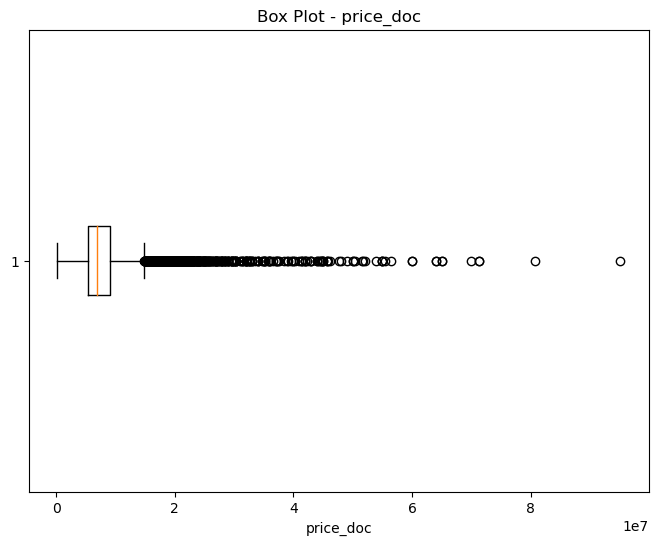

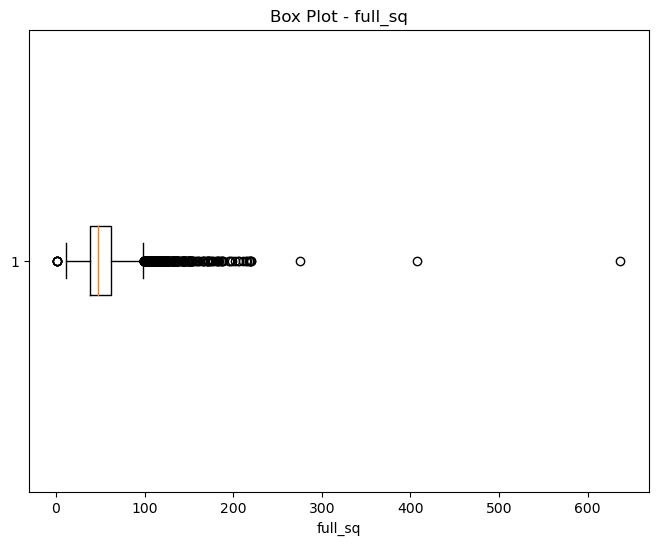

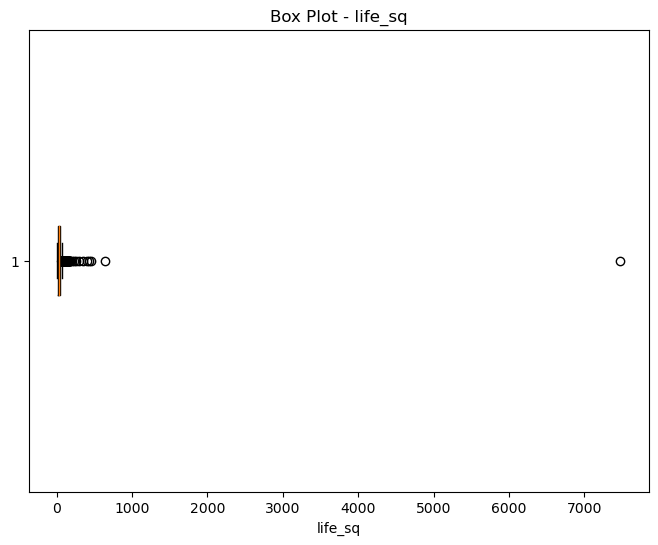

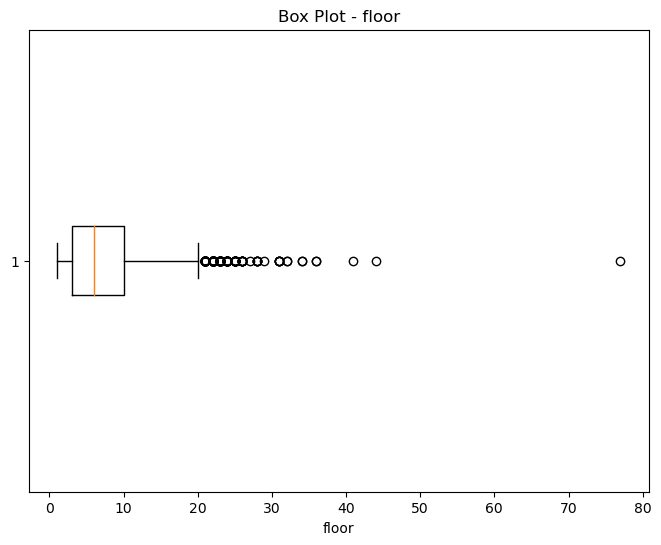

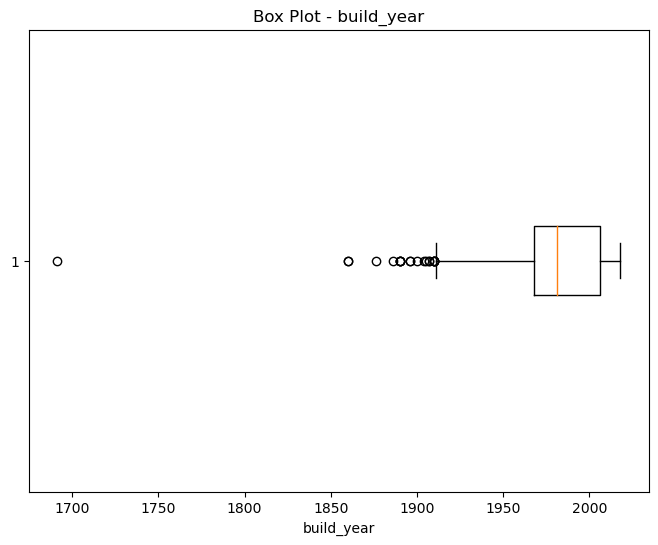

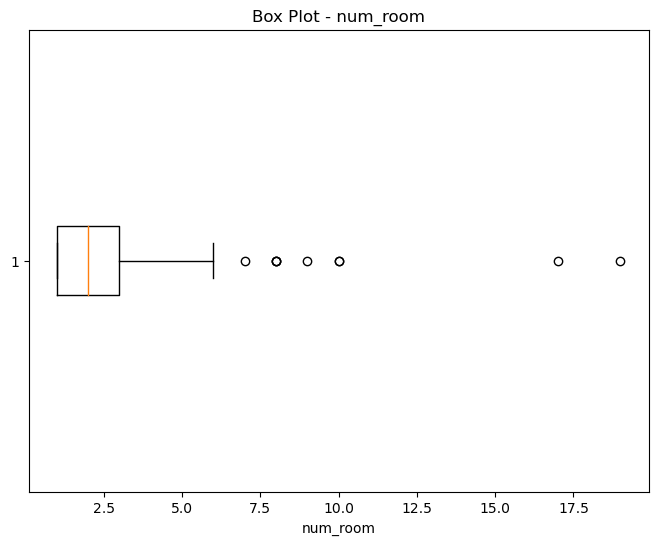

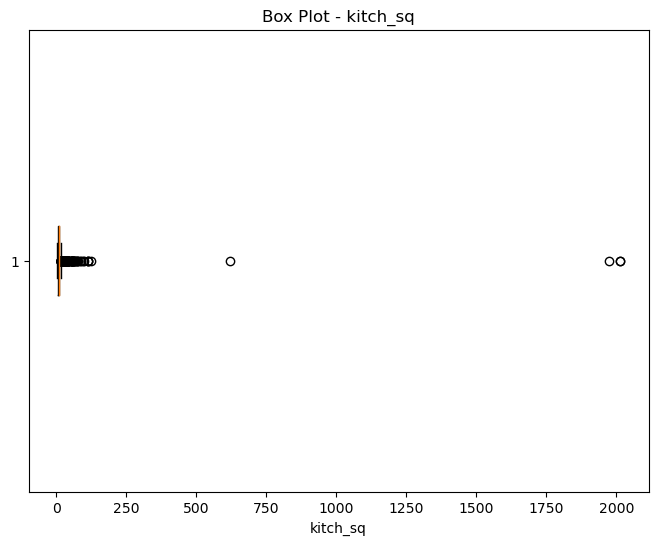

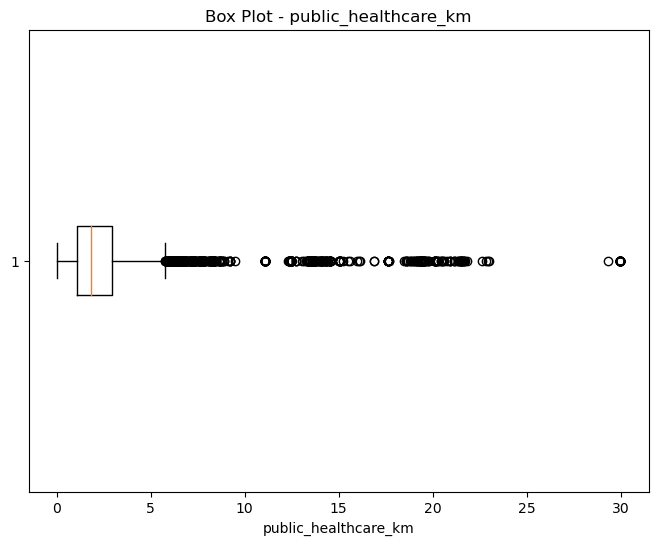

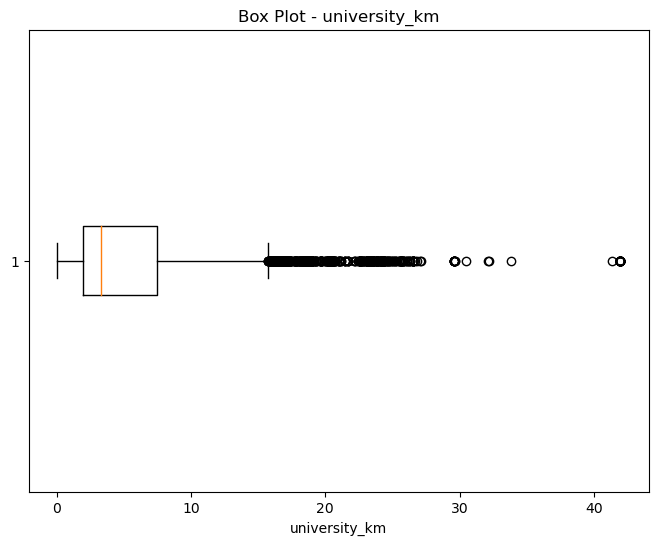

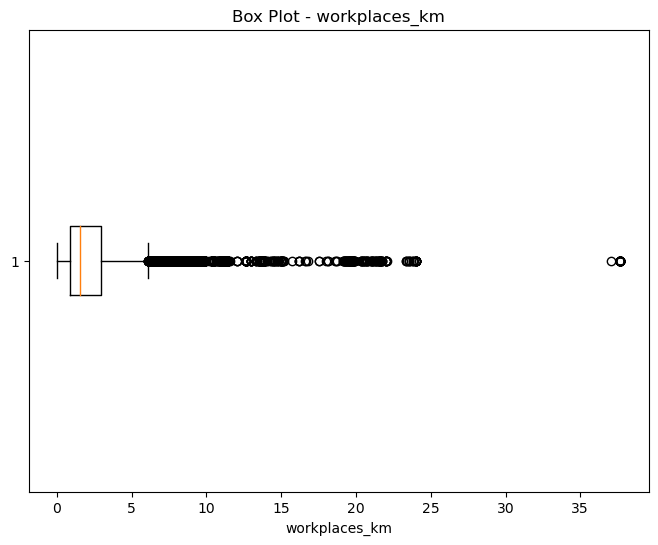

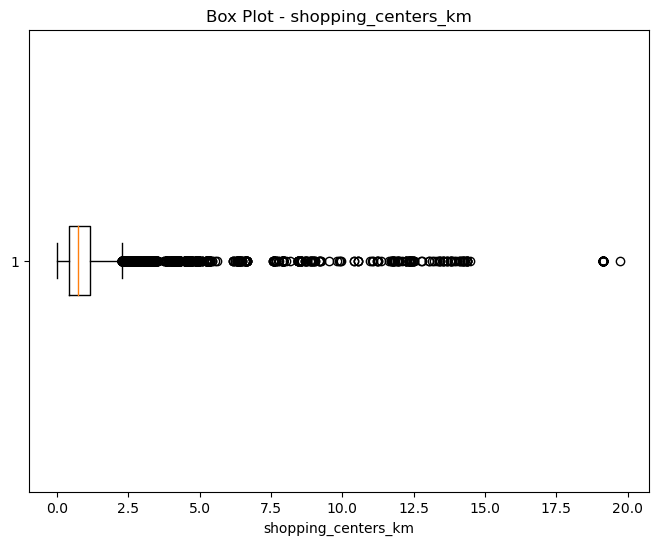

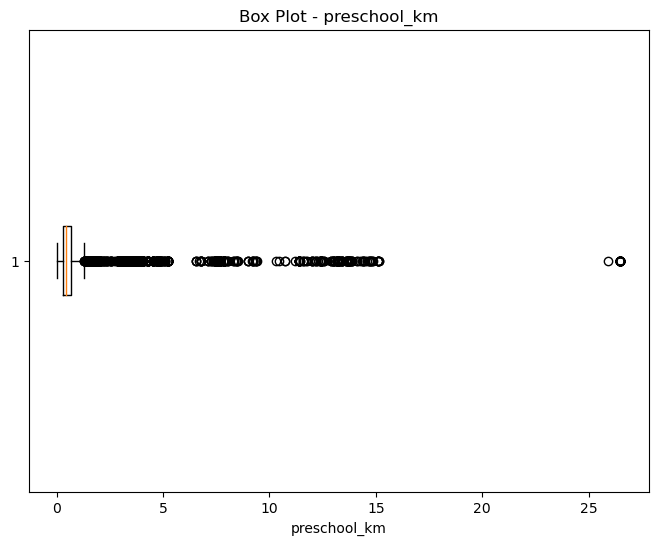

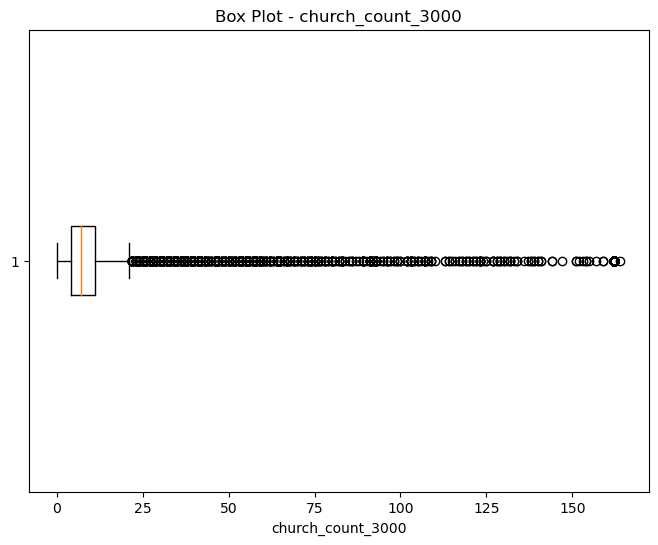

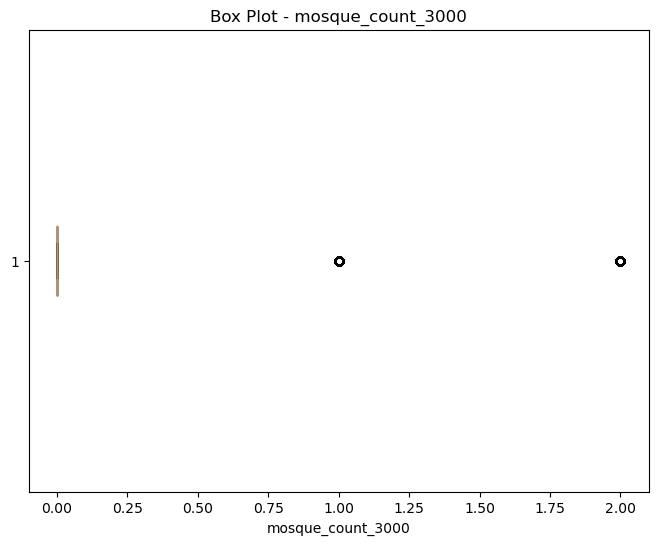

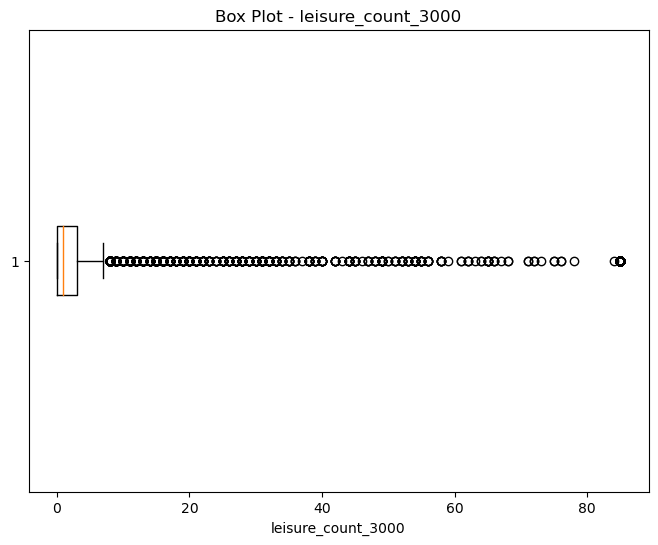

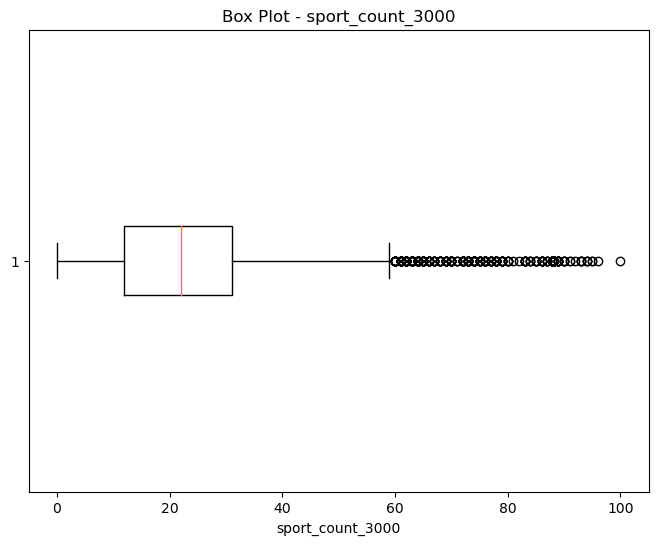

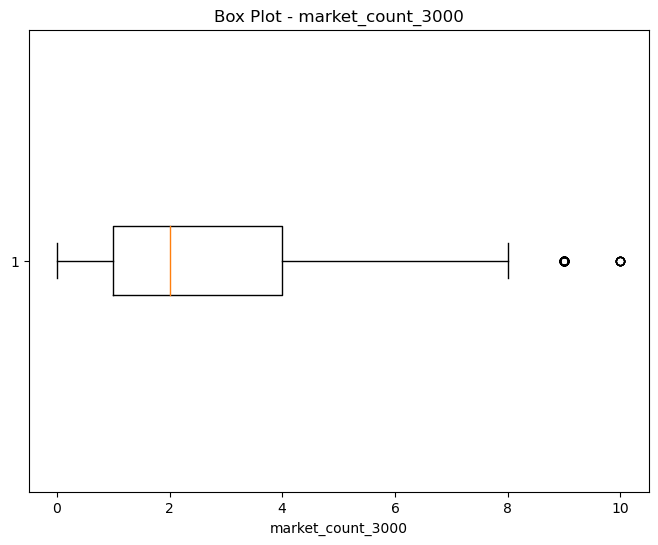

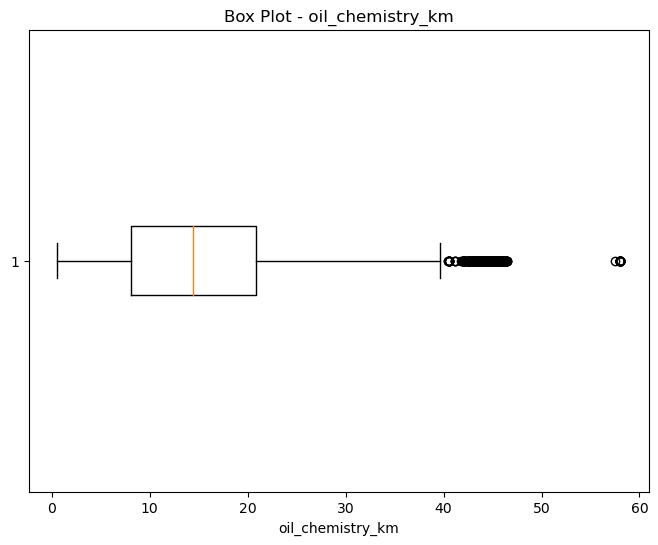

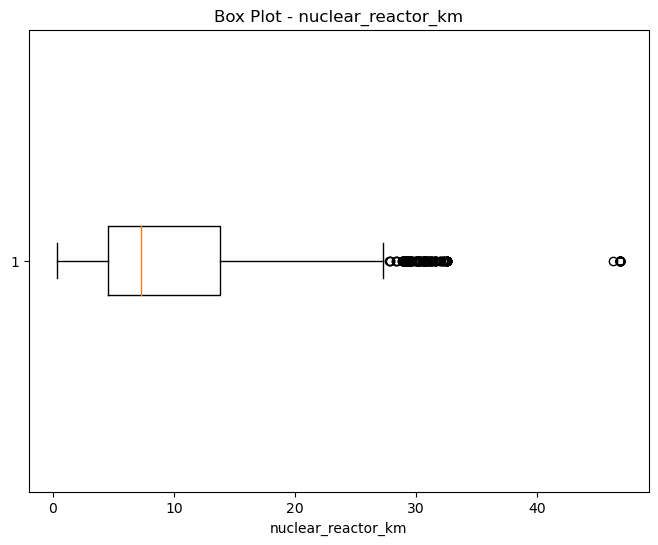

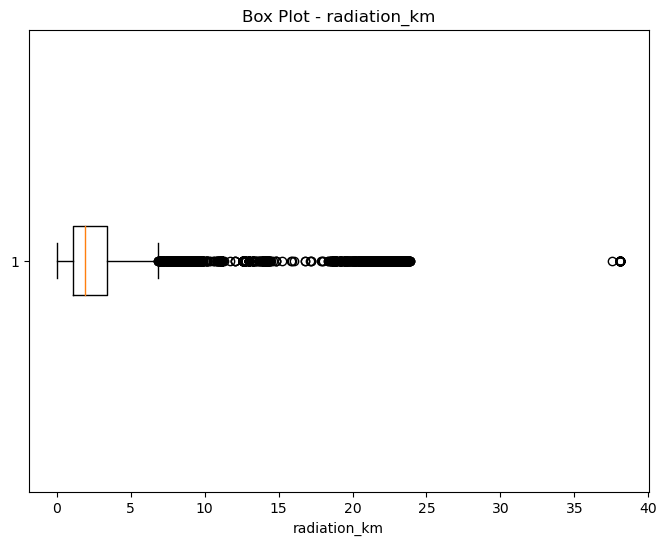

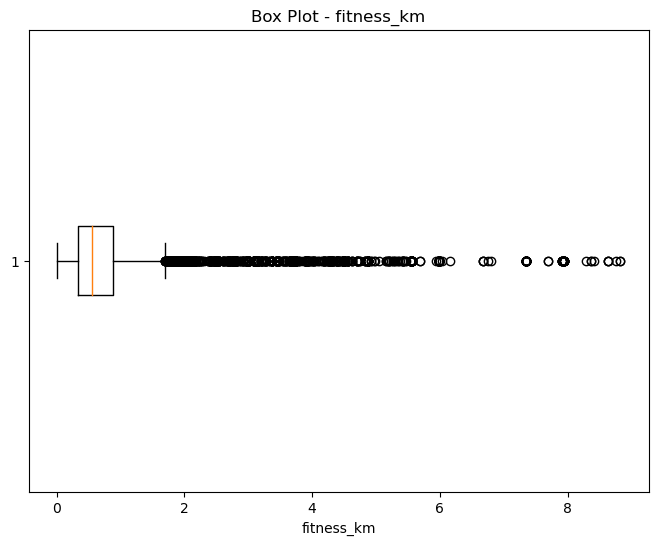

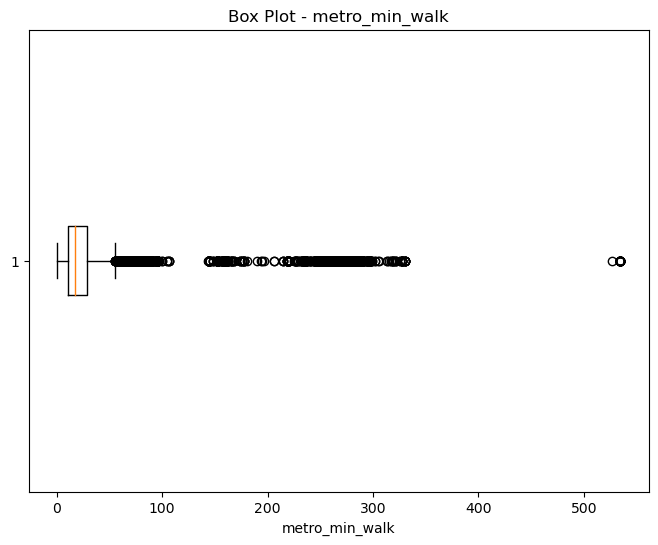

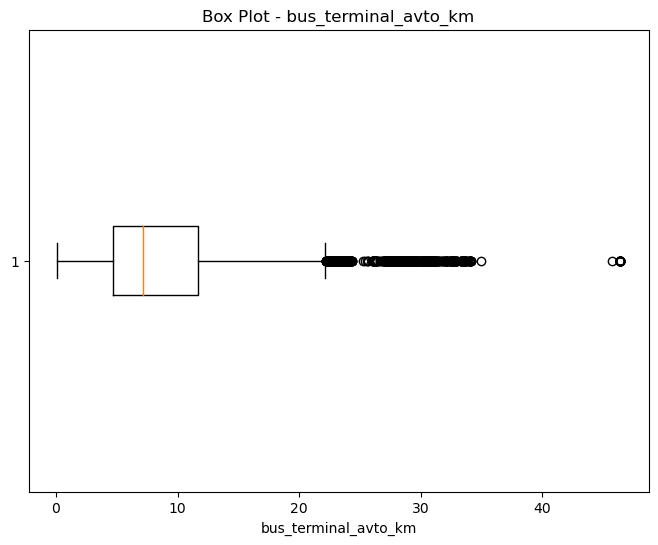

In [337]:
#Plot box plots for all relevant numerical attributes
if not os.path.exists("outlier_plots"):
     os.makedirs("outlier_plots")

for column in housing_df_sub.columns:
     if (column != 'sub_area') and (column != 'product_type') and (column != 'id'): 
            plt.figure(figsize=(8, 6))
            plt.boxplot(housing_df_sub[column], vert=False)
            plt.title(f"Box Plot - {column}")
            plt.xlabel(column)
            plt.savefig(f"outlier_plots/{column}_boxplot.png")
            plt.show()

In [338]:
#Function that returns the list of outliers based on Inter Quartile Range
def detect_outliers_iqr(data):
    outliers = []
    data = sorted(data)
    q1 = np.percentile(data, 25)
    q3 = np.percentile(data, 75)
    IQR = q3-q1
    lwr_bound = q1-(1.5*IQR)
    upr_bound = q3+(1.5*IQR)
    for i in data: 
        if (i<lwr_bound or i>upr_bound):
            outliers.append(i)
    return outliers


for m in housing_df_sub.columns:
    outlier_list = detect_outliers_iqr(housing_df_sub[m])
    #Remove records based on the outlier values of build_year
    if m == 'build_year':
        for n in range(0,(len(outlier_list))):
            housing_df_sub.drop(housing_df_sub[(housing_df_sub[m] == outlier_list[n])].index, inplace=True)
    #Replace outliers of number attributes by median values 
    elif (column != 'sub_area') and (column != 'product_type') and (column != 'id'):
        for p in range(0,len(outlier_list)):
            housing_df_sub[m] = housing_df_sub[m].replace({outlier_list[p]:housing_df_sub[m].median()})
        



C:\Users\gouth\AppData\Local\Temp\ipykernel_38380\4119418701.py:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_sub[m] = housing_df_sub[m].replace({outlier_list[p]:housing_df_sub[m].median()})
C:\Users\gouth\AppData\Local\Temp\ipykernel_38380\4119418701.py:21: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  housing_df_sub.drop(housing_df_sub[(housing_df_sub[m] == outlier_list[n])].index, inplace=True)


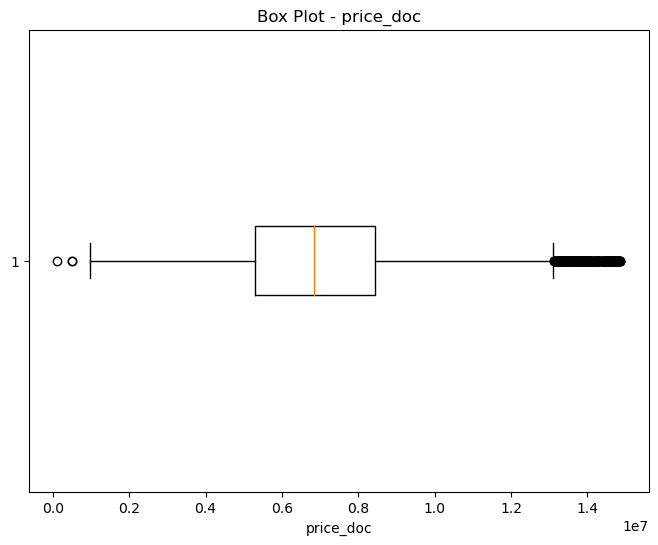

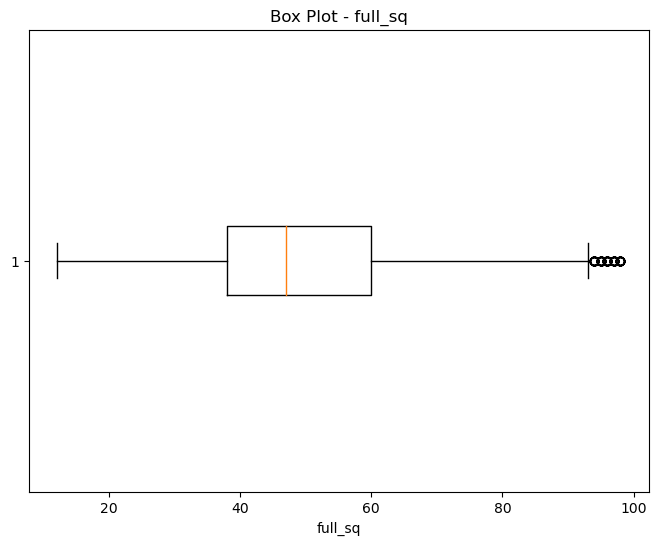

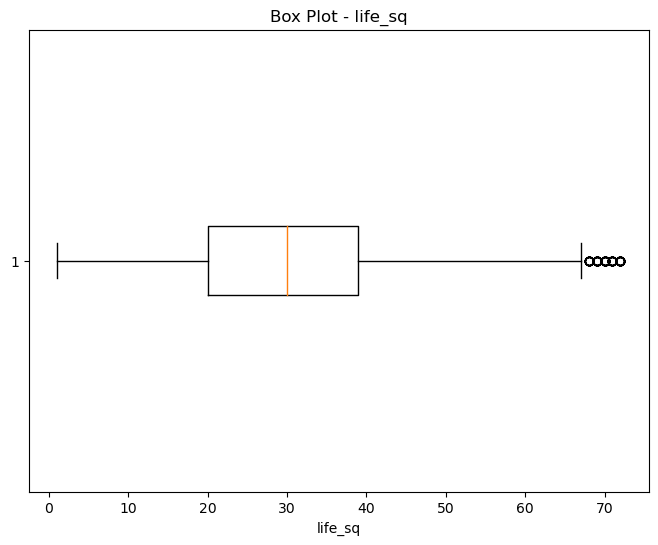

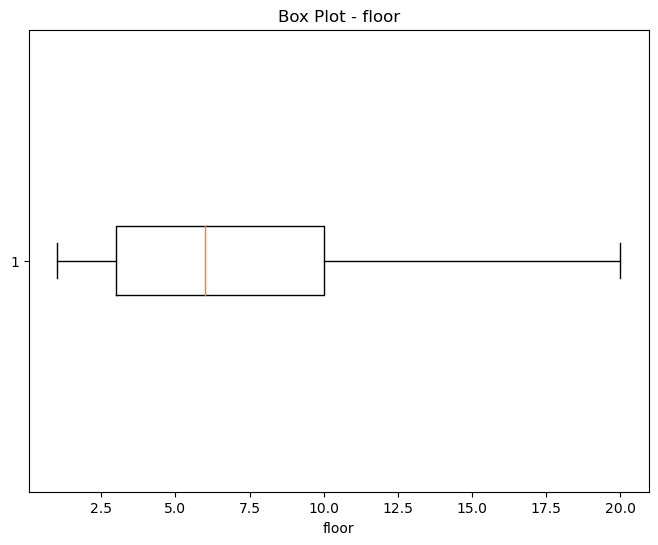

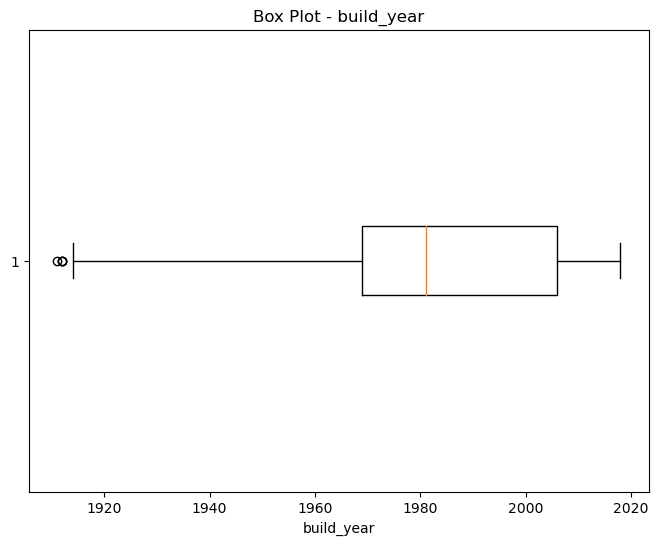

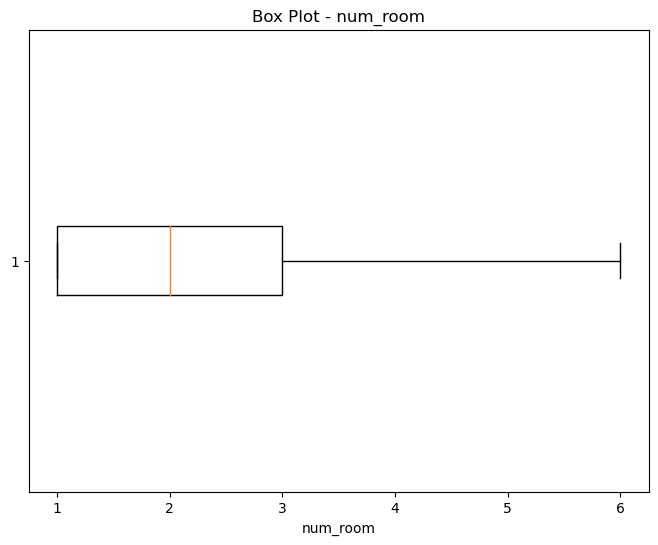

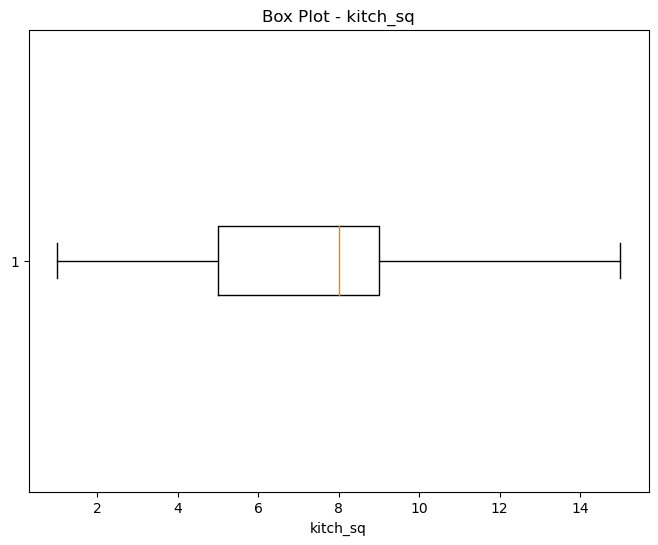

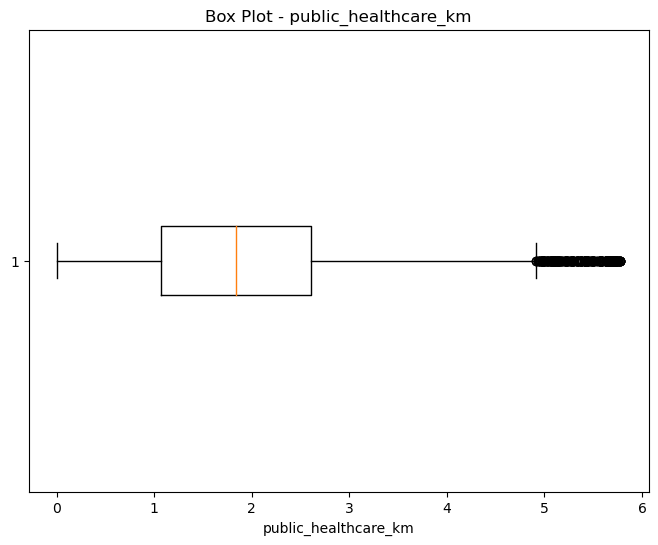

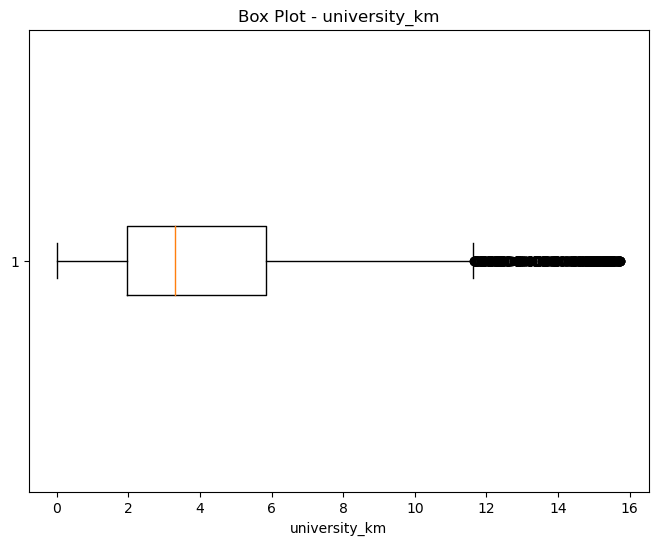

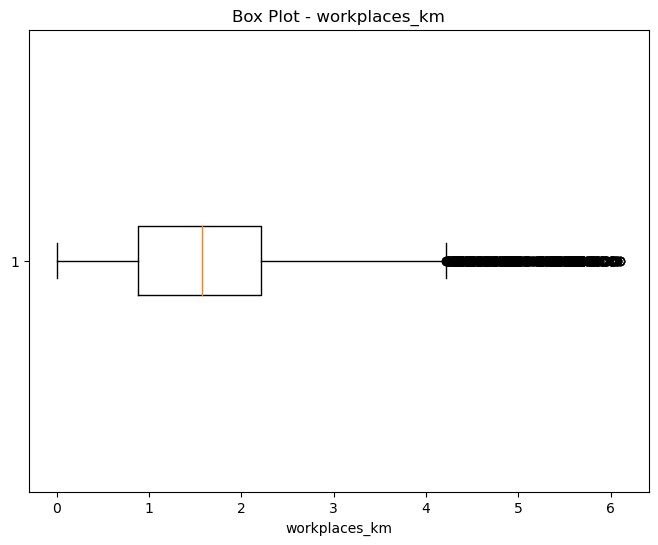

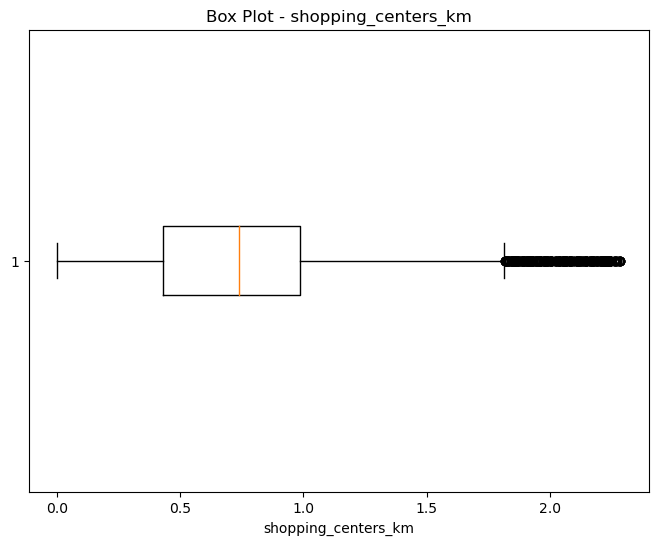

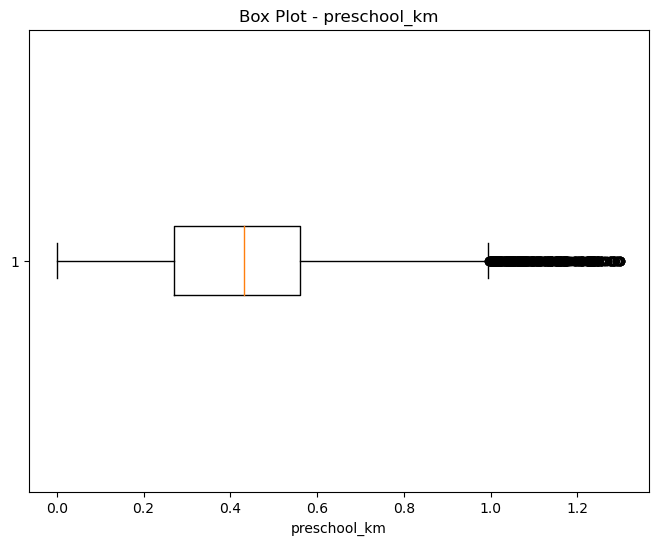

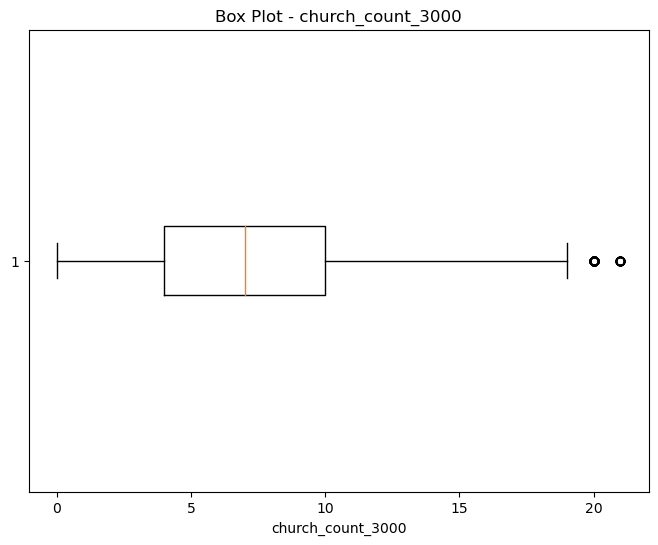

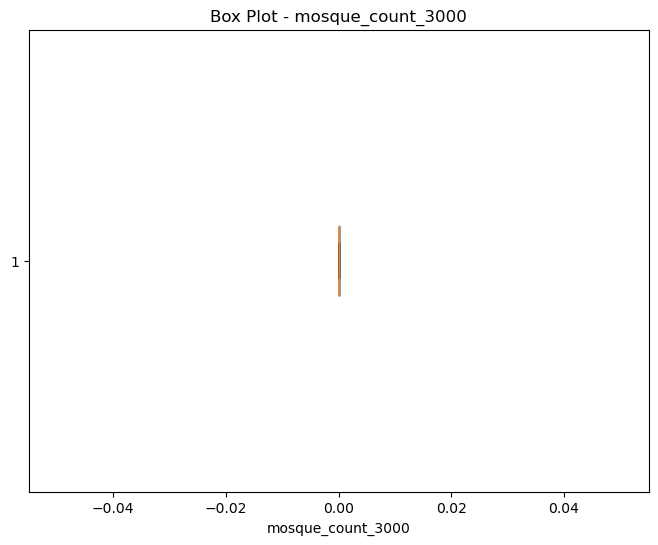

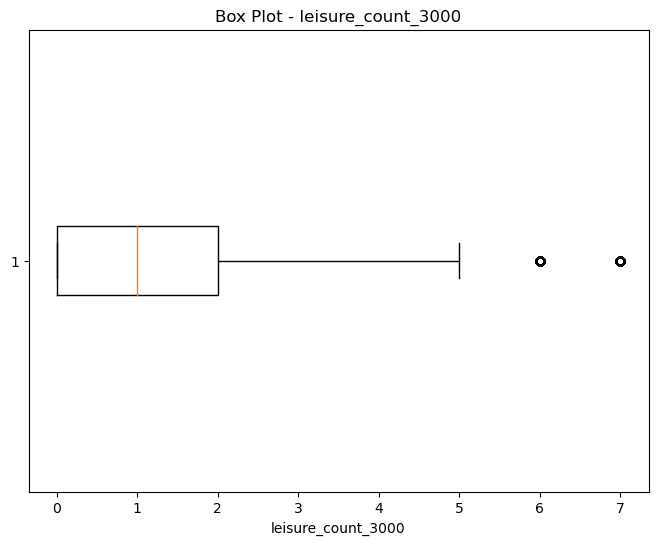

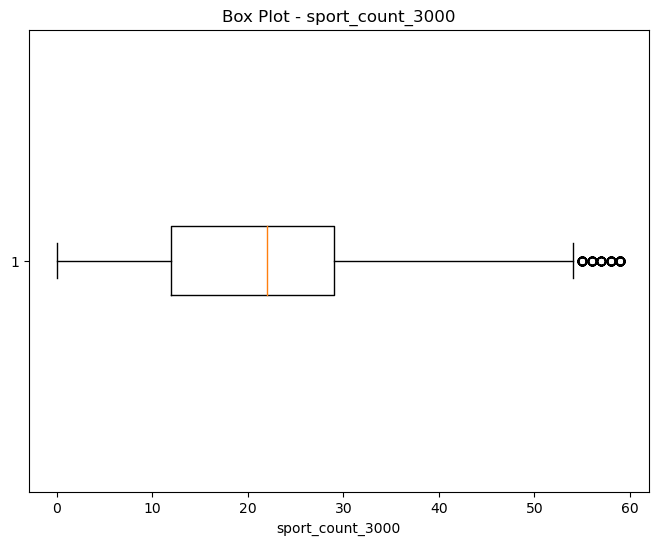

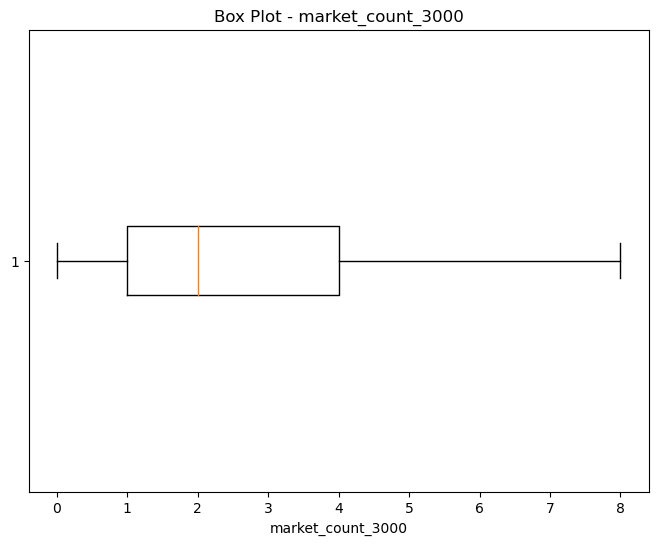

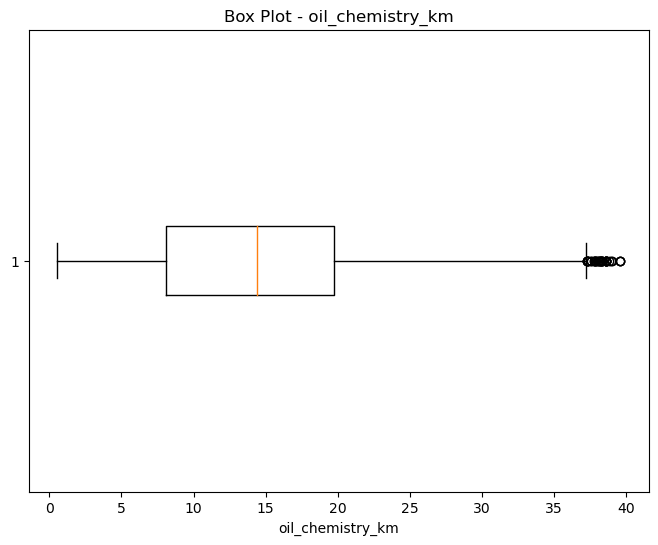

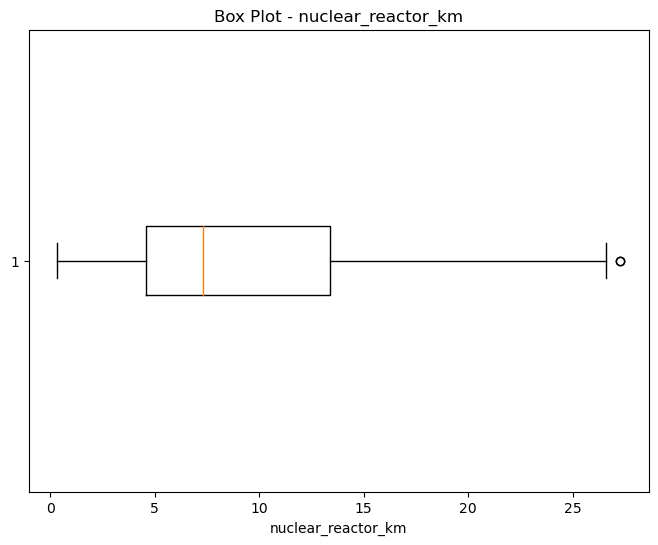

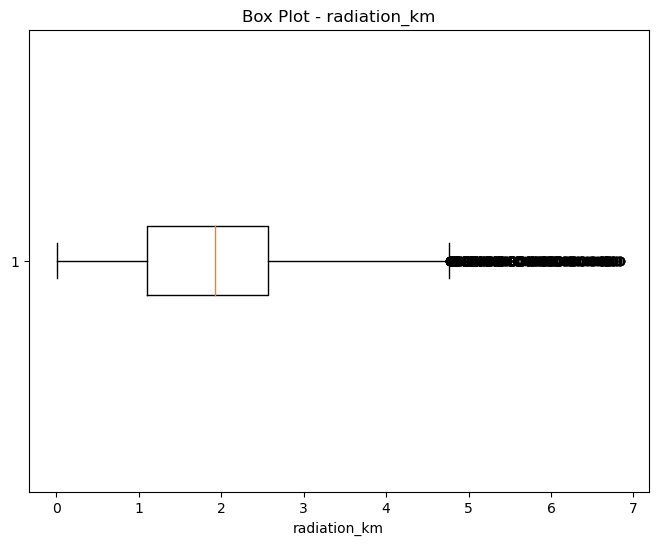

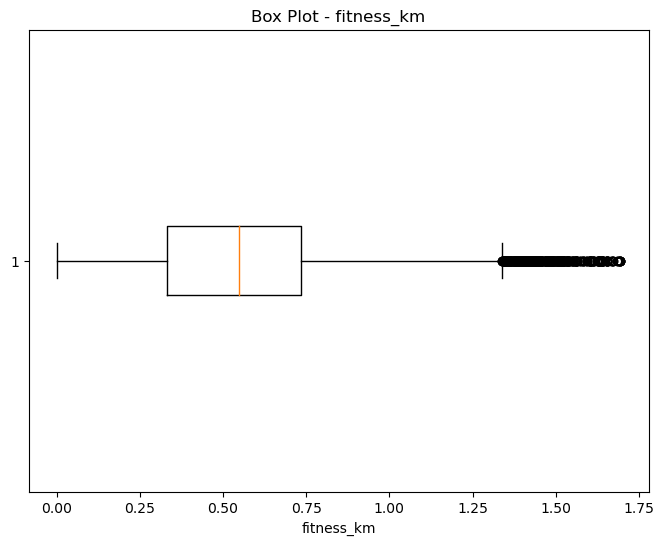

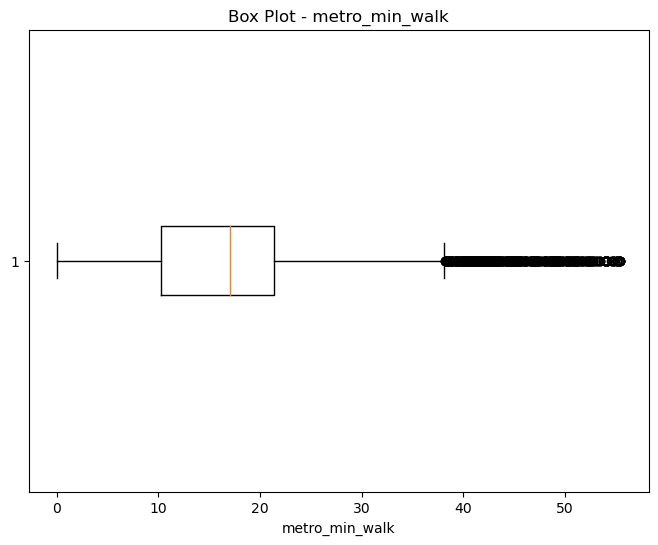

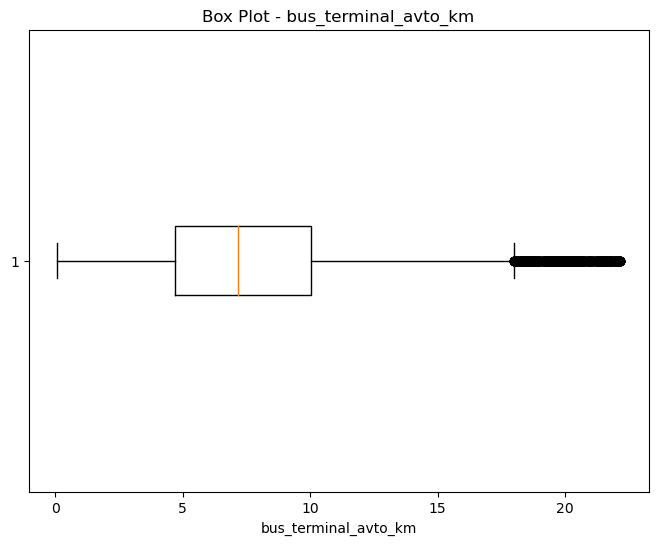

In [339]:
#Plot box plots after handling the outliers 
if not os.path.exists("outlier_plots"):
     os.makedirs("outlier_plots")

for column in housing_df_sub.columns:
     if (column != 'sub_area') and (column != 'product_type') and (column != 'id'): 
            plt.figure(figsize=(8, 6))
            plt.boxplot(housing_df_sub[column], vert=False)
            plt.title(f"Box Plot - {column}")
            plt.xlabel(column)
            plt.savefig(f"outlier_plots/{column}_boxplot.png")
            plt.show()

# FEATURE SCALING

In [340]:
#Creating a standard scaler object
scaler = StandardScaler()

housing_df_std = housing_df_sub.copy()

#Apply feature scaling on numerical attributes 
housing_df_std[housing_df_sub.columns] = scaler.fit_transform(housing_df_std[housing_df_sub.columns])
housing_df_std.head()


,id,price_doc,full_sq,life_sq,floor,build_year,num_room,kitch_sq,product_type,sub_area,...,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,oil_chemistry_km,nuclear_reactor_km,radiation_km,fitness_km,metro_min_walk,bus_terminal_avto_km
8135,-1.946458,0.718272,0.148811,-0.073676,0.704234,-0.272450,0.072634,0.319560,0.0,-0.336721,...,0.0,-0.802556,0.200527,-0.334785,0.621690,-0.863817,-1.154239,0.763886,0.106563,2.830364
8153,-1.943470,0.038294,1.689323,0.820727,-1.077095,1.401537,1.269638,1.697090,0.0,0.741851,...,0.0,-0.802556,-1.243632,-1.240717,1.204731,1.394616,-0.075106,0.766513,1.171790,0.458342
8154,-1.943304,0.068541,-0.364693,-0.317603,-0.186430,-0.764799,0.072634,-0.369205,0.0,0.981533,...,0.0,-0.802556,-0.559557,-0.334785,0.394584,0.348194,0.660114,-1.288842,-0.729228,-1.358052
8175,-1.939819,-0.153736,-0.814010,-0.886769,1.817565,-0.173980,-1.124370,0.319560,0.0,-1.175610,...,0.0,0.393379,0.808594,-0.787751,0.431546,-0.947838,-0.554211,-0.154547,3.451863,0.842540
8186,-1.937994,-0.340513,0.790691,-0.073676,2.262898,1.352302,0.072634,-2.091117,0.0,0.112684,...,0.0,-0.802556,-1.547665,-1.240717,-0.772123,1.246007,1.830267,-0.071243,2.754471,-0.148430


In [341]:
housing_df_sub.head()

,id,price_doc,full_sq,life_sq,floor,build_year,num_room,kitch_sq,product_type,sub_area,...,mosque_count_3000,leisure_count_3000,sport_count_3000,market_count_3000,oil_chemistry_km,nuclear_reactor_km,radiation_km,fitness_km,metro_min_walk,bus_terminal_avto_km
8135,8138,9000000,53,30.0,10.0,1980.0,2.0,8.0,1,49,...,0,0,24,2,19.134967,4.012248,0.563397,0.821462,18.420277,21.354034
8153,8156,7011550,77,41.0,2.0,2014.0,3.0,12.0,1,85,...,0,0,5,0,23.590580,17.243125,1.920888,0.822324,29.242588,10.125933
8154,8157,7100000,45,27.0,6.0,1970.0,2.0,6.0,1,93,...,0,0,14,2,17.399408,11.112731,2.845755,0.147876,9.928954,1.527929
8175,8178,6450000,38,20.0,15.0,1982.0,1.0,8.0,1,21,...,0,2,32,1,17.681875,3.520014,1.318199,0.520086,52.407275,11.944556
8186,8189,5903808,63,30.0,17.0,2013.0,2.0,1.0,1,64,...,0,0,1,0,8.483391,16.372510,4.317744,0.547421,45.322032,7.253743


# EXPLORATORY DATA ANALYSIS

## HISTOGRAM

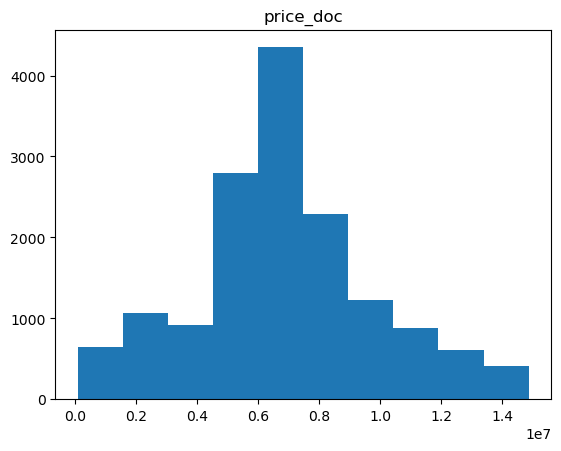

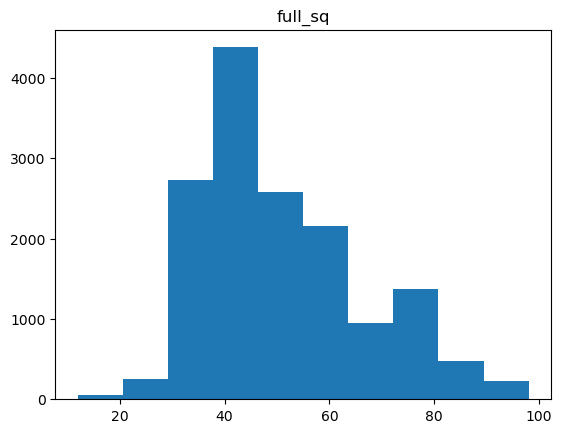

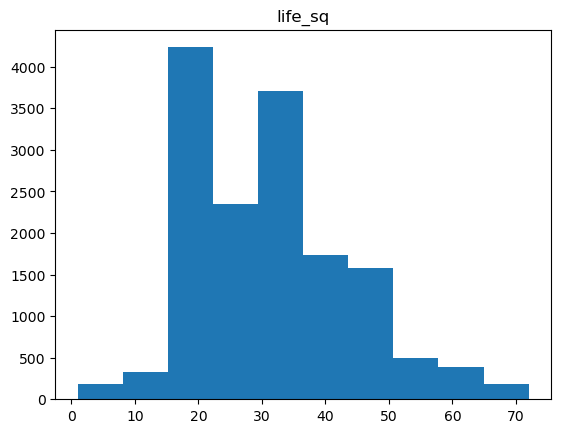

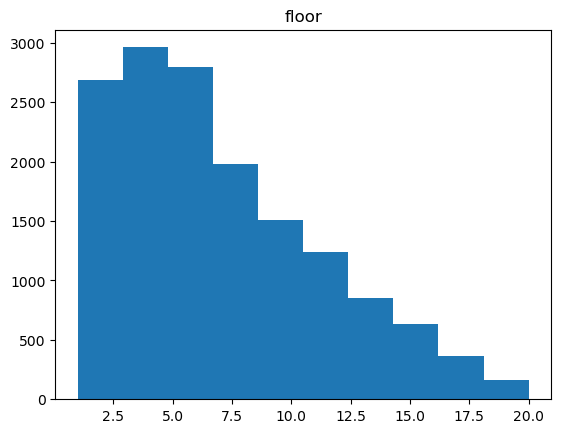

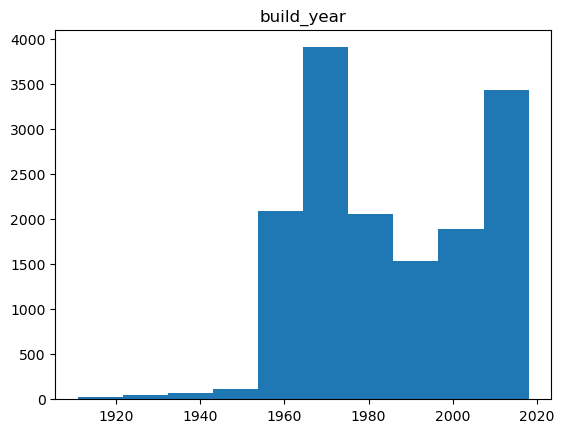

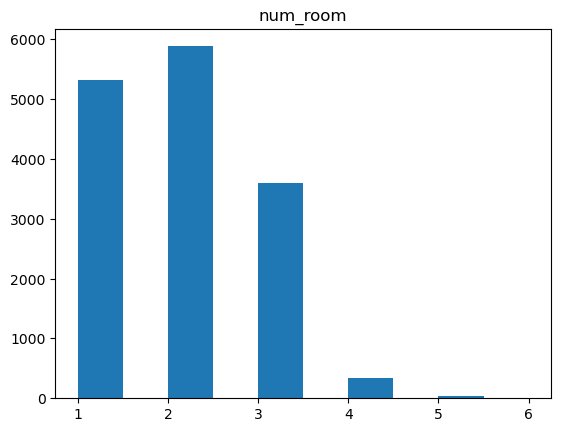

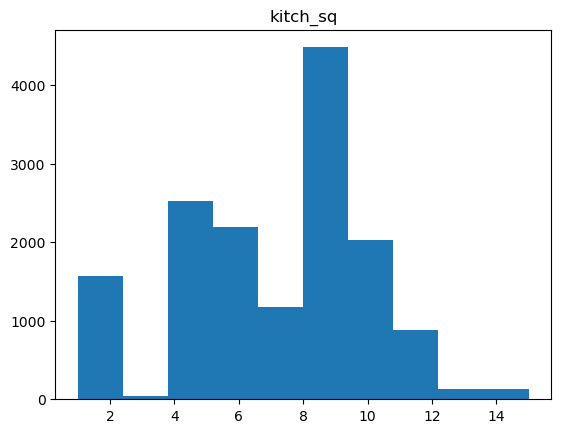

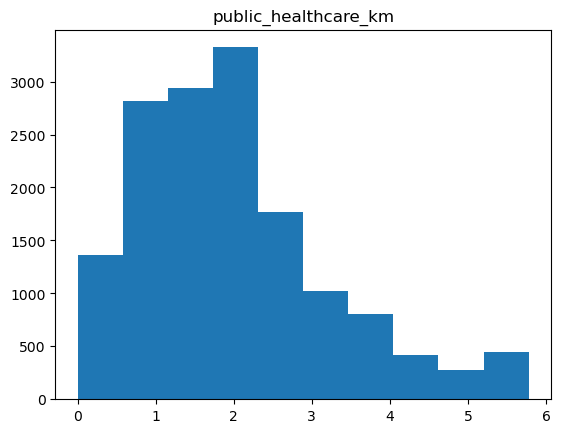

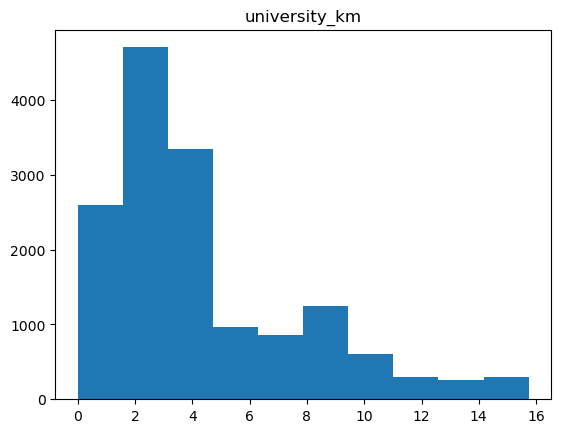

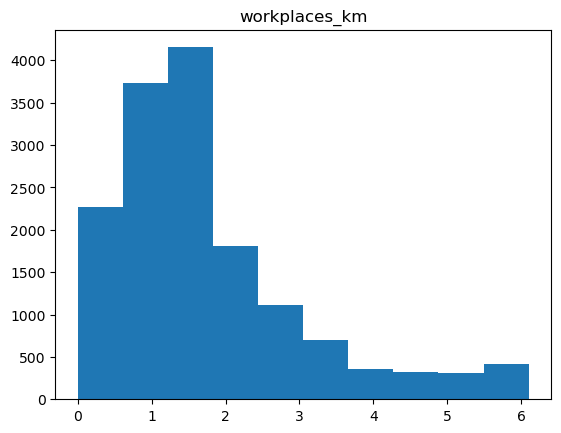

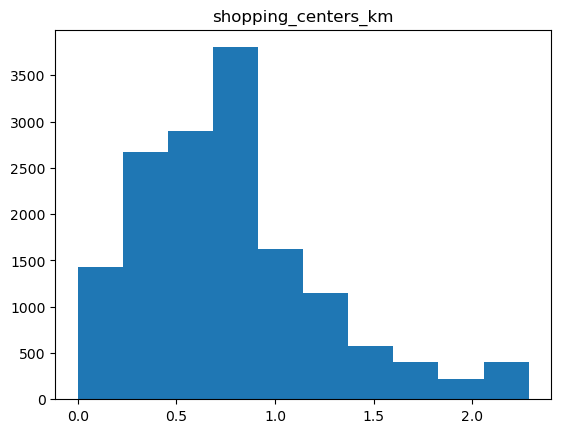

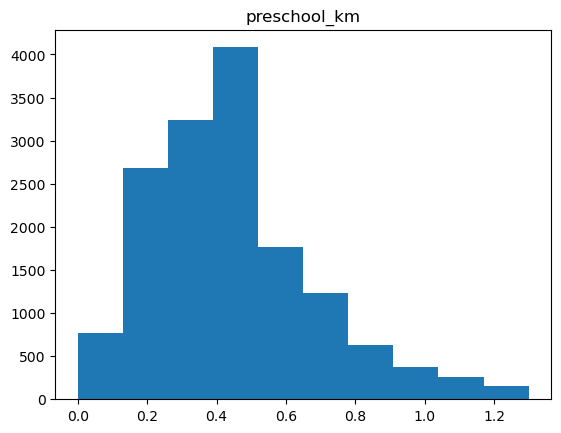

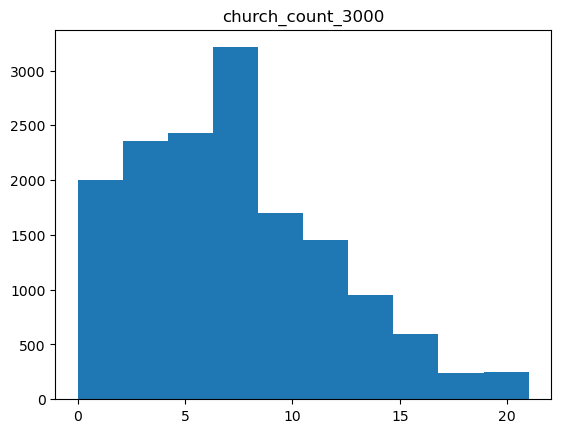

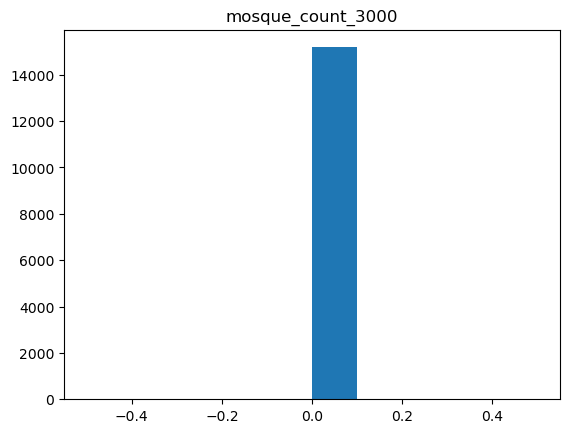

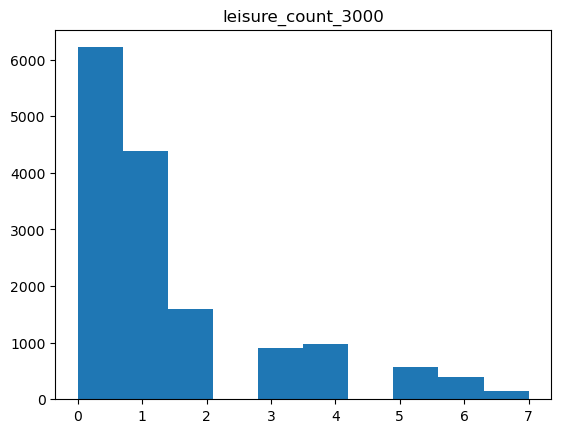

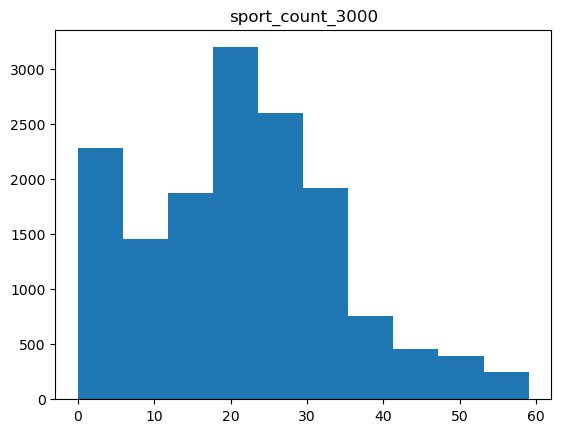

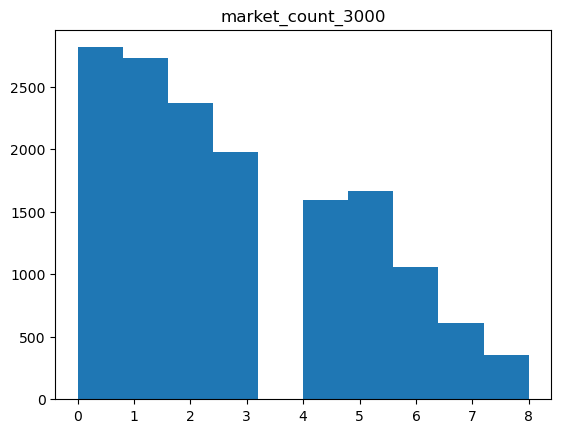

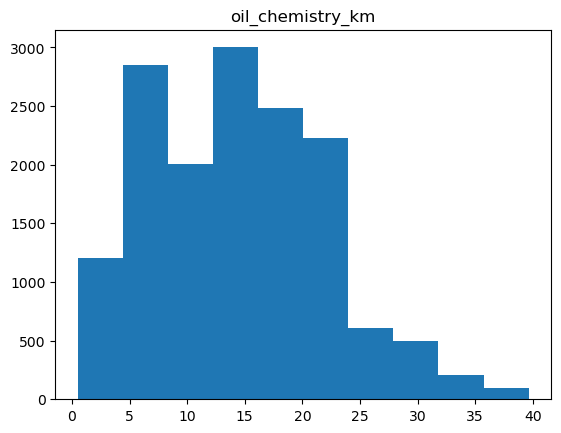

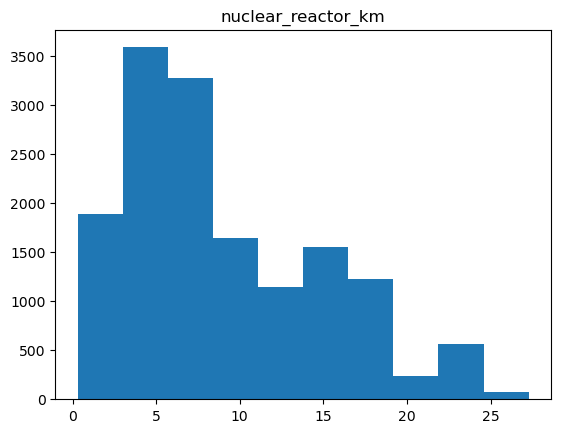

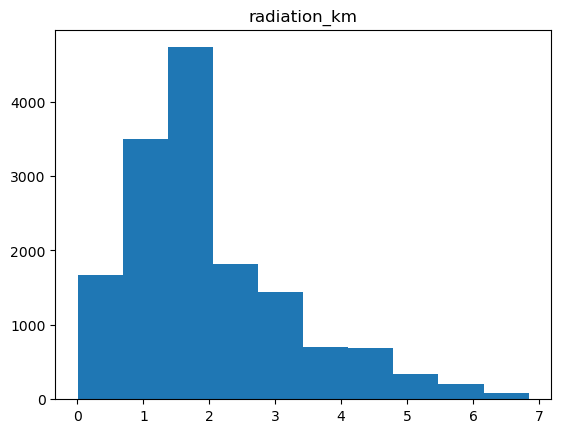

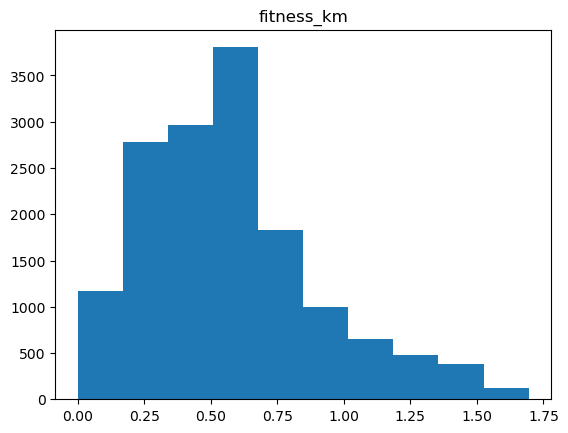

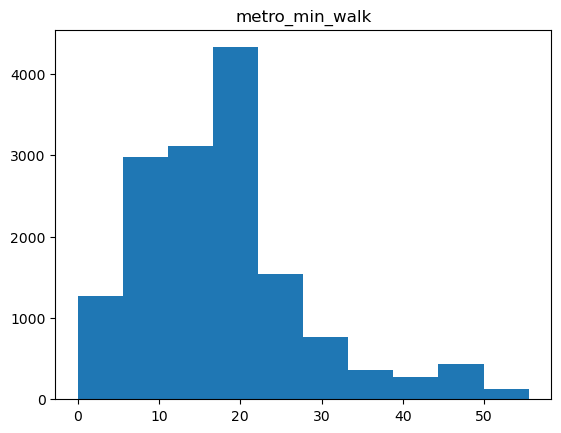

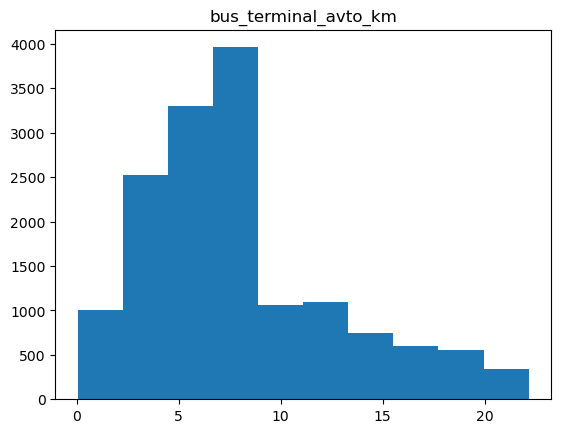

In [342]:
# Plot histogram to identify the distribution of values 
for i in housing_df_sub.columns:
    if (i != 'sub_area') and (i != 'product_type') and (i!= 'id'): 
        x =housing_df_sub[i]
        plt.hist(x, bins=10)
        plt.title(i)
        plt.show()


## VALIDATION SPLIT

In [343]:
#Define predictors and outcome variables for regression analysis
predictors  = ['full_sq','life_sq','floor','build_year','num_room','kitch_sq','product_type','sub_area','public_healthcare_km','university_km','workplaces_km','shopping_centers_km','preschool_km','church_count_3000','mosque_count_3000','leisure_count_3000','sport_count_3000','market_count_3000','oil_chemistry_km','nuclear_reactor_km','radiation_km','fitness_km','metro_min_walk','bus_terminal_avto_km']
outcome = 'price_doc'

In [344]:
#Partition data into predictors and outcomes 
y = housing_df_sub[outcome]
X = housing_df_sub[predictors]

In [345]:
#Data is split into training and validation set
train_X,valid_X,train_y,valid_y = train_test_split(X,y, test_size=0.4, random_state=0)

# MILESTONE 3

# LINEAR REGRESSION

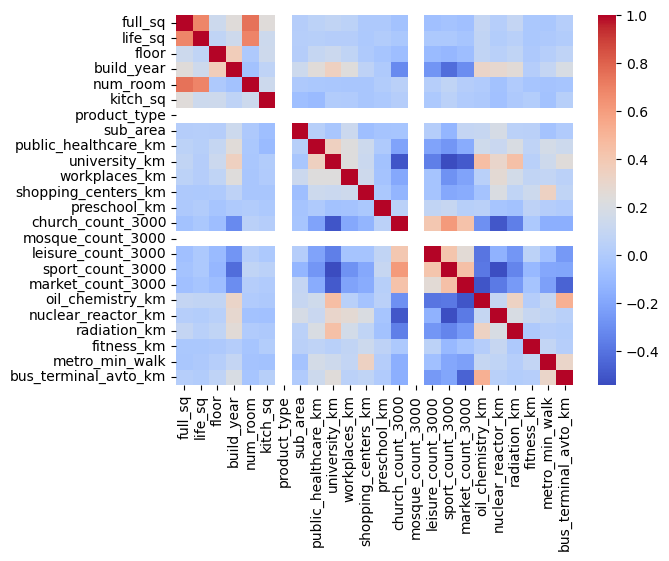

The correlation matrix of predictor variables is: 
                        full_sq   life_sq     floor  build_year  num_room  \
full_sq               1.000000  0.684135  0.137371    0.245514  0.752037   
life_sq               0.684135  1.000000  0.074081    0.138893  0.689036   
floor                 0.137371  0.074081  1.000000    0.368740 -0.007444   
build_year            0.245514  0.138893  0.368740    1.000000 -0.054440   
num_room              0.752037  0.689036 -0.007444   -0.054440  1.000000   
kitch_sq              0.241920  0.135666  0.140734    0.071393  0.135781   
product_type               NaN       NaN       NaN         NaN       NaN   
sub_area              0.022380  0.027506  0.022481    0.136468 -0.010392   
public_healthcare_km  0.055923  0.033145  0.099738    0.252039 -0.020258   
university_km         0.081861  0.018828  0.131606    0.346914 -0.028793   
workplaces_km         0.055213  0.022359  0.074022    0.240652 -0.033453   
shopping_centers_km  -0.010130 -0.01

In [346]:
#Generate correlation heatmap to identify the relationship between predictor variables
house_corr_matrix = X.corr()
sns.heatmap(house_corr_matrix, cmap='coolwarm', annot=False)
plt.show()
#Display the correlation matrix to show the exact degree of correlation 
print("The correlation matrix of predictor variables is: \n",house_corr_matrix )

## INFERENCE
It is evident that there exist multicollinearity among predictor variables and following predictor reduction techniques are deployed to arrive at the oprtimal set of predictor varibales.</br>
a. Forward selection.</br>
b. Backward selection.</br>
c. Step wise selection.

In [347]:
# Backward selection for reducing the predictors 
def train_model(variables):
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    return AIC_score(train_y, model.predict(train_X[variables]), model)

allVariables = train_X.columns
best_model_back_elim, best_variables_back_elim = backward_elimination(allVariables, train_model,score_model, verbose=True)
print(best_variables_back_elim)

regressionSummary(valid_y, best_model_back_elim.predict(valid_X[best_variables_back_elim]))

Variables: full_sq, life_sq, floor, build_year, num_room, kitch_sq, product_type, sub_area, public_healthcare_km, university_km, workplaces_km, shopping_centers_km, preschool_km, church_count_3000, mosque_count_3000, leisure_count_3000, sport_count_3000, market_count_3000, oil_chemistry_km, nuclear_reactor_km, radiation_km, fitness_km, metro_min_walk, bus_terminal_avto_km
Start: score=293776.95
Step: score=293774.95, remove product_type
Step: score=293772.95, remove mosque_count_3000
Step: score=293770.96, remove preschool_km
Step: score=293769.06, remove oil_chemistry_km
Step: score=293767.19, remove workplaces_km
Step: score=293766.28, remove market_count_3000
Step: score=293765.63, remove life_sq
Step: score=293764.78, remove build_year
Step: score=293764.78, remove None
['full_sq', 'floor', 'num_room', 'kitch_sq', 'sub_area', 'public_healthcare_km', 'university_km', 'shopping_centers_km', 'church_count_3000', 'leisure_count_3000', 'sport_count_3000', 'nuclear_reactor_km', 'radiatio

In [348]:
#Forward selection for reducing the predictors
def train_model(variables):
    if len(variables) == 0:
        return None
    model = LinearRegression()
    model.fit(train_X[variables], train_y)
    return model

def score_model(model, variables):
    if len(variables) == 0:
        return AIC_score(train_y, [train_y.mean()] * len(train_y), model, df=1)
    return AIC_score(train_y, model.predict(train_X[variables]), model)

best_model_fwd_elim, best_variables_fwd_elim = forward_selection(train_X.columns, train_model, score_model,verbose=True)
print(best_variables_fwd_elim)

regressionSummary(valid_y, best_model_fwd_elim.predict(valid_X[best_variables_fwd_elim]))

Variables: full_sq, life_sq, floor, build_year, num_room, kitch_sq, product_type, sub_area, public_healthcare_km, university_km, workplaces_km, shopping_centers_km, preschool_km, church_count_3000, mosque_count_3000, leisure_count_3000, sport_count_3000, market_count_3000, oil_chemistry_km, nuclear_reactor_km, radiation_km, fitness_km, metro_min_walk, bus_terminal_avto_km
Start: score=296933.38, constant
Step: score=294785.03, add full_sq
Step: score=294146.86, add sport_count_3000
Step: score=293991.67, add nuclear_reactor_km
Step: score=293946.50, add metro_min_walk
Step: score=293900.20, add floor
Step: score=293852.39, add num_room
Step: score=293824.96, add radiation_km
Step: score=293801.58, add kitch_sq
Step: score=293787.98, add leisure_count_3000
Step: score=293779.58, add public_healthcare_km
Step: score=293772.80, add bus_terminal_avto_km
Step: score=293770.14, add university_km
Step: score=293767.30, add church_count_3000
Step: score=293766.11, add sub_area
Step: score=2937

In [349]:
#Step wise selection for reducing the predictors
best_model_step_elim, best_variables_step_elim = stepwise_selection(train_X.columns, train_model, score_model,verbose=True)
print(best_variables_step_elim)

regressionSummary(valid_y, best_model_step_elim.predict(valid_X[best_variables_step_elim]))

Variables: full_sq, life_sq, floor, build_year, num_room, kitch_sq, product_type, sub_area, public_healthcare_km, university_km, workplaces_km, shopping_centers_km, preschool_km, church_count_3000, mosque_count_3000, leisure_count_3000, sport_count_3000, market_count_3000, oil_chemistry_km, nuclear_reactor_km, radiation_km, fitness_km, metro_min_walk, bus_terminal_avto_km
Start: score=296933.38, constant
Step: score=294785.03, add full_sq
Step: score=294146.86, add sport_count_3000
Step: score=293991.67, add nuclear_reactor_km
Step: score=293946.50, add metro_min_walk
Step: score=293900.20, add floor
Step: score=293852.39, add num_room
Step: score=293824.96, add radiation_km
Step: score=293801.58, add kitch_sq
Step: score=293787.98, add leisure_count_3000
Step: score=293779.58, add public_healthcare_km
Step: score=293772.80, add bus_terminal_avto_km
Step: score=293770.14, add university_km
Step: score=293767.30, add church_count_3000
Step: score=293766.11, add sub_area
Step: score=2937

## INFERENCE
The RMSE and MAE of regression model generated using the list of variables obtained as an output of forward selection, backward selection and step wise selection are the same. Hence the list of variables obtained from backward elimination is used to buit the final regression model. 

In [350]:
#Partition data into predictors and outcomes based on the reduced predictor variables
y1 = housing_df_sub[outcome]
X1 = housing_df_sub[best_variables_back_elim]

In [351]:
#Data is split into training and validation set
train_X1, valid_X1, train_y1, valid_y1 = train_test_split(X1, y1, test_size=0.4, random_state=0)

In [352]:
#Regression model is generated based on training set
housing_lm = LinearRegression()
housing_lm.fit(train_X1, train_y1)

LinearRegression()

In [353]:
#Print the coefficients and intercepts of the regression model
print('The intercept of regression model:', housing_lm.intercept_)
print('The coefficients of regression model:')
print(pd.DataFrame({'Predictor': X1.columns, 'coefficient': housing_lm.coef_}))

The intercept of regression model: 2161738.046263988
The coefficients of regression model:
               Predictor    coefficient
0                full_sq   69985.888890
1                  floor   45683.974609
2               num_room  350518.729327
3               kitch_sq   44543.727310
4               sub_area   -1536.334934
5   public_healthcare_km  -73830.439466
6          university_km   23128.228666
7    shopping_centers_km  -95870.750365
8      church_count_3000   20596.380777
9     leisure_count_3000   52530.454909
10      sport_count_3000   28740.171902
11    nuclear_reactor_km  -63364.270065
12          radiation_km  129637.406574
13            fitness_km -123183.116362
14        metro_min_walk  -11611.942088
15  bus_terminal_avto_km  -19864.630825


In [354]:
#Print the equation for predicting the median house price based on regression analysis
reg_eqn =str(housing_lm.intercept_)
for i in range(len(X1.columns)):
    reg_eqn = reg_eqn + "+" + "(" + str(housing_lm.coef_[i]) +"*" + X1.columns[i] + ")"+" "
print('The regression equation is as follows:',reg_eqn)

The regression equation is as follows: 2161738.046263988+(69985.88889015459*full_sq) +(45683.974608572826*floor) +(350518.7293269343*num_room) +(44543.72731015566*kitch_sq) +(-1536.3349343002233*sub_area) +(-73830.4394656693*public_healthcare_km) +(23128.228666094037*university_km) +(-95870.75036493881*shopping_centers_km) +(20596.380777250888*church_count_3000) +(52530.45490916584*leisure_count_3000) +(28740.171901791473*sport_count_3000) +(-63364.27006460673*nuclear_reactor_km) +(129637.40657417217*radiation_km) +(-123183.11636155071*fitness_km) +(-11611.94208840638*metro_min_walk) +(-19864.63082470934*bus_terminal_avto_km) 


In [355]:
#Make predictions using the regression model 
housing_lm_pred = housing_lm.predict(valid_X1)
result = pd.DataFrame({'Predicted': housing_lm_pred, 'Actual': valid_y1,
 'Residual': valid_y1 - housing_lm_pred, 'Percent_error':((valid_y1 - housing_lm_pred)/valid_y1)*100})
result.head()

,Predicted,Actual,Residual,Percent_error
9294,6.723344e+06,8200000,1.476656e+06,18.008002
14272,5.849484e+06,6900000,1.050516e+06,15.224871
10106,5.057678e+06,5800000,7.423215e+05,12.798647
18388,7.551609e+06,990000,-6.561609e+06,-662.788837
23801,5.501730e+06,7500000,1.998270e+06,26.643594


In [356]:
#Print performance measures
regressionSummary(train_y1, housing_lm.predict(train_X1))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 2444548.7620
            Mean Absolute Error (MAE) : 1748620.0796
          Mean Percentage Error (MPE) : -33.1080
Mean Absolute Percentage Error (MAPE) : 51.6491


# LINEAR REGRESSION WITH STANDARDIZED VALUES

In [357]:
#Partition data into predictors and outcomes based on the reduced predictor variables
y2 = housing_df_sub[outcome]
X2 = housing_df_std[best_variables_back_elim]

In [358]:
#Data is split into training and validation set
train_X2, valid_X2, train_y2, valid_y2 = train_test_split(X2, y2, test_size=0.4, random_state=0)

In [359]:
#Regression model is generated based on training set
housing_lm_std = LinearRegression()
housing_lm_std.fit(train_X2, train_y2)

LinearRegression()

In [360]:
#Print the coefficients and intercepts of the regression model
print('The intercept of regression model:', housing_lm_std.intercept_)
print('The coefficients of regression model:')
print(pd.DataFrame({'Predictor': X2.columns, 'coefficient': housing_lm_std.coef_}))

The intercept of regression model: 6897201.20216324
The coefficients of regression model:
               Predictor   coefficient
0                full_sq  1.090326e+06
1                  floor  2.051680e+05
2               num_room  2.928301e+05
3               kitch_sq  1.293438e+05
4               sub_area -5.127897e+04
5   public_healthcare_km -9.053670e+04
6          university_km  7.838565e+04
7    shopping_centers_km -4.505627e+04
8      church_count_3000  8.811461e+04
9     leisure_count_3000  8.784840e+04
10      sport_count_3000  3.781185e+05
11    nuclear_reactor_km -3.712152e+05
12          radiation_km  1.630769e+05
13            fitness_km -4.042152e+04
14        metro_min_walk -1.179730e+05
15  bus_terminal_avto_km -9.403035e+04


In [361]:
#Print performance measures
regressionSummary(train_y2, housing_lm_std.predict(train_X2))


Regression statistics

                      Mean Error (ME) : -0.0000
       Root Mean Squared Error (RMSE) : 2444548.7620
            Mean Absolute Error (MAE) : 1748620.0796
          Mean Percentage Error (MPE) : -33.1080
Mean Absolute Percentage Error (MAPE) : 51.6491


In [362]:
#Make predictions using the regression model 
housing_lm_pred_std = housing_lm_std.predict(valid_X2)
result2 = pd.DataFrame({'Predicted': housing_lm_pred_std, 'Actual': valid_y2,
 'Residual': valid_y2 - housing_lm_pred_std, 'Percent_error':((valid_y2 - housing_lm_pred_std)/valid_y2)*100})
result2.head()

,Predicted,Actual,Residual,Percent_error
9294,6.723344e+06,8200000,1.476656e+06,18.008002
14272,5.849484e+06,6900000,1.050516e+06,15.224871
10106,5.057678e+06,5800000,7.423215e+05,12.798647
18388,7.551609e+06,990000,-6.561609e+06,-662.788837
23801,5.501730e+06,7500000,1.998270e+06,26.643594


## INFERENCE
There is no significant impact due to feature scaling of predictor variables on the model performance results. Hence the model without feature scaling is considered for further analysis.

# K NEAREST NEIGHBOURS

In [363]:
#Partition data into predictors and outcomes based on the reduced predictor variables
y3 = housing_df_sub[outcome]
X3 = housing_df_std[predictors]

In [364]:
#Data is split into training and validation set
train_X3, valid_X3, train_y3, valid_y3 = train_test_split(X3, y3, test_size=0.4, random_state=0)

In [365]:
#KNN regressor model is generated based on training set
KNN_model = KNeighborsRegressor()
KNN_model.fit(train_X3, train_y3)

KNeighborsRegressor()

In [366]:
#Evaluate the model efficiency by calculating mean average error and mean square error 
mse_1 = mean_squared_error(train_y3, KNN_model.predict(train_X3))
mae_1 = mean_absolute_error(train_y3, KNN_model.predict(train_X3))
print("mse = ",mse_1," & mae = ",mae_1," & rmse = ", sqrt(mse_1))

mse =  4213538160591.0044  & mae =  1429034.5979354272  & rmse =  2052690.4687728747


In [367]:
#Make predictions using the KNN model 
housing_lm_pred_knn = KNN_model.predict(valid_X3)
result3 = pd.DataFrame({'Predicted': housing_lm_pred_knn, 'Actual': valid_y3,
 'Residual': valid_y3 - housing_lm_pred_knn, 'Percent_error':((valid_y3 - housing_lm_pred_knn)/valid_y3)*100})
result3.head()

,Predicted,Actual,Residual,Percent_error
9294,6930000.0,8200000,1270000.0,15.487805
14272,5560000.0,6900000,1340000.0,19.420290
10106,6920000.0,5800000,-1120000.0,-19.310345
18388,7540000.0,990000,-6550000.0,-661.616162
23801,5040000.0,7500000,2460000.0,32.800000


INFERENCE: Based on the RMSE and MAE values, KNN regressor perform better than linear regression model. Hence the KNN regressor model is used to predict the price of the test data point.

In [368]:
test_data_point = pd.DataFrame({'full_sq':[60],'life_sq':[30],'floor':[2],'build_year':[2017],'num_room':[3],'kitch_sq':[8],'product_type':['OwnerOccupier'],'sub_area':['Lianozovo'],'public_healthcare_km':[5],'university_km':[5],'workplaces_km':[5],'shopping_centers_km':[5],'preschool_km':[5],'church_count_3000':[5],'mosque_count_3000':[0],'leisure_count_3000':[2],'sport_count_3000':[15],'market_count_3000':[3],'oil_chemistry_km':[10],'nuclear_reactor_km':[9],'radiation_km':[3],'fitness_km':[0.5],'metro_min_walk':[10],'bus_terminal_avto_km':[5]})

#Encoding the categorical value to respective numerical equivalent
for s in range(0,len(dist_val)):
    test_data_point['sub_area'] = test_data_point['sub_area'].replace({dist_val[s]:(s+1)})
test_data_point['product_type'] = test_data_point['product_type'].replace({'Investment': 1, 'OwnerOccupier': 2})

#Create a subset of the dataset with only relevant predictor variables
test_data_relevant = test_data_point[predictors]

#Creating a standard scaler object
scaler1 = StandardScaler()

test_data_relevant_std = test_data_relevant.copy()

#Apply feature scaling on numerical attributes 
test_data_relevant_std[test_data_relevant_std.columns] = scaler.fit_transform(test_data_relevant_std[test_data_relevant_std.columns])

#Predict and print the price of housing property for test data point
housing_price = KNN_model.predict(test_data_relevant_std)[0].astype(int)

print("The predicted price for the given input data requirements is: ",housing_price)

The predicted price for the given input data requirements is:  8020000
